# **مقدمه**

In [ ]:
from IPython.display import HTML
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p><span style="font-size: 14pt;">ابتدا برخی فایل&zwnj;های مورد نیاز (از قبیل دیتاست که توضیحات آن در ادامه خواهد آمد) را از اینترنت دانلود و آن&zwnj;ها را در درایو ذخیره می&zwnj;کنیم مجوز دسترسی به درایو در ابتدای همین بخش درخواست می‌گردد.</span></p>
</span>
"""
HTML(text)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
##Q1
#!wget -P /content/drive/MyDrive/NLP_UT/farsTail https://huggingface.co/datasets/azarijafari/FarsTail/resolve/main/data/Test-word.csv
#!wget -P /content/drive/MyDrive/NLP_UT/farsTail https://huggingface.co/datasets/azarijafari/FarsTail/resolve/main/data/Train-word.csv
#!wget -P /content/drive/MyDrive/NLP_UT/farsTail https://huggingface.co/datasets/azarijafari/FarsTail/resolve/main/data/Val-word.csv

##Q2
#!wget -P /content/drive/MyDrive/NLP_UT/sentipers https://github.com/phosseini/SentiPers/blob/master/data/sentipers.xlsx
#snappfood already downloaded from previous CAs

Mounted at /content/drive


In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p><span style="font-size: 14pt;">حال کتابخانه&zwnj;هایی که استفاده خواهیم کرد را فراخوانی می&zwnj;کنیم. همچنین مسیرهایی از درایو که در طول کد استفاده خواهیم کرد در همین قسمت تعریف می‌شوند.</span></p>
</span>
"""
HTML(text)


In [ ]:
!pip install transformers
!pip install datasets

from IPython.display import HTML
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import unicodedata as ud
import re
import random
import math
import copy
import sys, os
import codecs
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import pipeline
from transformers import AutoModel, AdamW, get_cosine_schedule_with_warmup, AutoModelForSequenceClassification
from transformers import BertConfig, BertModel, AutoConfig
import torch
import torch.nn as nn
#from torchmetrics.functional.classification import auroc
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

jupi_stdout = sys.stdout
train_set_file_dir = '/content/drive/MyDrive/NLP_UT/farsTail/Train-word.csv' #آدرس فایل مربوط به داده های train
validation_set_file_dir = '/content/drive/MyDrive/NLP_UT/farsTail/Val-word.csv' #آدرس فایل مربوط به داده های validation
test_set_file_dir = '/content/drive/MyDrive/NLP_UT/farsTail/Test-word.csv' #آدرس فایل مربوط به داده های test
stopwords_dir = '/content/drive/MyDrive/NLP_UT/fa_nonverbal_stopwords_not_include_numbers_except_1.txt'
parsbert = "HooshvareLab/bert-base-parsbert-uncased"
LaBSE = "sentence-transformers/LaBSE"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

!pip install hazm
import hazm

In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p><span style="font-size: 14pt;"><span style="font-size: 14pt;">در ادامه گزارش و کدهای سوال اول می‌آیند. احتراما برای گزارش و کدهای سوال دوم، از بخش sections در محیط notebook روی «شروع پاسخ سوال دوم» کلیک نمایید (این بخش در گوگل کولب به صورت پیشفرض در سمت چپ صفحه قرار داد).</span></p>
</div>
</span>
"""
HTML(text)


# شروع پاسخ سوال اول

In [ ]:
#@title ‎ 
from IPython.display import HTML
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800;900&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; line-height: 28pt; font-weight: 500; text-align: center;'>
<h1 style="font-family:Vazirmatn; font-weight: 800;"> پاسخ سوال اول</h1>
</span>
"""
HTML(text)


# معرفی، خواندن و بررسی دیتاست

In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<h2 style="font-family:Vazirmatn; font-weight: 800;"> بررسی دیتاست</h2>
<img style="display: block; margin-left: auto; margin-right: auto;" src="https://github.com/dml-qom/FarsTail/raw/master/farstail.png" alt="FarsTail" width="611" height="130" />
<br>
<div dir="rtl" style="padding-right: 40px;"><span style="font-size: 14pt;">استنتاج زبان طبیعی (NLI: Natural Language Inference) از کاربردهای مهم پردازش زبان طبیعی است و در حقیقت بیانگر این است که آیا می&zwnj;توان از جمله&zwnj; یا فرض p (permise)، فرضیه h (hypothesis) را استنتاج نمود یا خیر. برای این مسئله دو ورودی p, h ویک خروجی داریم. خروجی می&zwnj;تواند یکی از سه حالت:</span></div>
<div dir="rtl" style="padding-right: 40px;">
<ul>
<li><span style="font-size: 14pt;">e برای Entailment یا قابل استنتاج</span></li>
<li><span style="font-size: 14pt;">c برای Contradiction یا متناقض</span></li>
<li><span style="font-size: 14pt;">n برای neutral یا خنثی (یعنی دو جمله&zwnj;ی ورودی نسبت به هم خنثی هستند. نه می&zwnj;توان h را از p استنتاج نمود و نه می&zwnj;توان تناقضی بین این دو یافت</span></li>
</ul>
<p><span style="font-size: 14pt;"><span style="font-size: 14pt;">دیتاست FarsTail برای چنین وظیفه&zwnj;ای توسط تهیه کنندگان آن، تهیه شده است و شامل سه فایل train، validation و test است. فایل&zwnj;های train و validation این دیتاست شامل سه ستون: ۱- premise برای جملات یا فرض&zwnj;ها ۲- hypothesis برای فرضیه&zwnj;ها و ۳- label برای برای وضعیت بین دو ورودی قبلی است. ستون آخر شامل یکی از سه حرف c، n یا e است که معنای آن&zwnj;ها را بالاتر بیان نمودیم. همچنین فایل test شامل دو ستون بیشتر به نام&zwnj;های hard(overlap) و hard(hypothesis) است که می&zwnj;توانند مقدار ۱ یا ۰ را به خود بگیرند. مقدار ۱ یعنی استنتاج برای آن سطر از دیتاست، سخت خواهد بود. ستون اول سختی از لحاظ تداخل ورودی&zwnj;ها، و ستون دوم سختی از لحاظ اصل استنتاج را بیان می&zwnj;کند.</span></span></p>
<p><span style="font-size: 14pt;"><span style="font-size: 14pt;">داده&zwnj;های این دیتاست از چندین هزار سوال و جواب چهار گزینه&zwnj;ای فارسی استخراج شدند. FarsTail در کل شامل ۱۰۳۶۷ سطر بوده که هر یک از دسته&zwnj;های test ،train و validation حاوی ۷۲۶۶، ۱۵۳۷ و ۱۵۶۴ سطر هستند.</span></span></p>
<p><span style="font-size: 14pt;"><span style="font-size: 14pt;">در ادامه فایل‌های دیتاست را (train ،test و validation) خوانده و در متغیرهای مربوطه ذخیره می‌کنیم. سپس نمونه‌ای از محتویات هر دسته می‌آوریم. همچنین توزیع هر نوع برچسب (c ،e و n) را برای هر یک از دسته‌ها نمایش می‌دهیم. می‌بینیم که تقریبا از هر برچسب به نسبت مساوی در هر دسته قرار دارد البته داده‌های با برچسب c در تمام دسته‌ها اندکی از داده با برچسب‌های دیگر کم‌تر هستند ولی اختلاف بسیار اندک است.</span></span></p>
</div>
</span>
"""
HTML(text)


In [ ]:
farsTail_train = pd.read_csv(train_set_file_dir, sep='\t')
farsTail_val = pd.read_csv(validation_set_file_dir, sep='\t')
farsTail_test = pd.read_csv(test_set_file_dir, sep='\t')

In [ ]:
print('train set: ')
dist = np.unique(farsTail_train['label'], return_counts=True)
for i in range(len(dist[0])):
  print(dist[0][i],': ', dist[1][i])
farsTail_train

train set: 
c :  2389
e :  2429
n :  2448


,premise,hypothesis,label
0,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,نخستین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی...,e
1,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,کانون های جغرافیایی مصر، اندلس و شام، نخستین ر...,c
2,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,سیسیل بعد از اسپانیا بزرگ ترین کانونی بود که ه...,n
3,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,نقاشی های تزئینی و تندیس های بی‌کیفیت، یکی از ...,e
4,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,با کیفیت بودن تندیس های دوره اموی، یکی از ویژگ...,c
...,...,...,...
7261,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,تعداد فصول قانون اساسی ۱۴ و تعداد اصول آن ۱۷۷ ...,e
7262,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,قانون اساسی دارای ۲۵ فصل و ۱۷۵ اصل می باشد.,c
7263,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,در ۲۴ آبان ۵۸ کار تدوین قانون اساسی به پایان ر...,n
7264,محاصره اقتصادی پیامبر (ص) و یارانش که در سال ه...,حضرت محمد (ص) و یارانش از ششمین سال بعثت تا هش...,c


In [ ]:
print('validation set: ')
dist = np.unique(farsTail_val['label'], return_counts=True)
for i in range(len(dist[0])):
  print(dist[0][i],': ', dist[1][i])
farsTail_val

validation set: 
c :  499
e :  515
n :  523


,premise,hypothesis,label
0,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,کتاب مگیستی (المجسطی) از آثار بطلمیوس است و از...,e
1,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,المجسطی (مگیستی)، یکی از کتاب های هرون از مکتب...,c
2,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,ترجمه المجسطی، پایه تهیه جداول نجومی گردید که ...,n
3,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,کتاب کلمات قصار یا فصول، اثر بقراط است.,e
4,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,جالینوس، نویسنده کتاب کلمات قصار بوده است.,c
...,...,...,...
1532,"فقط ۶ کشور قطر, عمان، کویت، امارات، بحرین و عر...","عراق از اعضای تشکیل دهنده ی ""شورای همکاری خلیج...",c
1533,"فقط ۶ کشور قطر, عمان، کویت، امارات، بحرین و عر...","ایجاد مراکز تحقیقاتی-علمی از اهداف ""شورای همکا...",n
1534,امام خمینی پنج هجرت مهم داشته اند که از قرار ز...,حضرت امام خمینی (ره) برای اولین بار به ترکیه ت...,e
1535,امام خمینی پنج هجرت مهم داشته اند که از قرار ز...,عراق اولین کشوری بود که امام خمینی به آن تبعید...,c


In [ ]:
print('test set: ')
dist = np.unique(farsTail_val['label'], return_counts=True)
for i in range(len(dist[0])):
  print(dist[0][i],': ', dist[1][i])
del dist
farsTail_test

test set: 
c :  499
e :  515
n :  523


,premise,hypothesis,label,hard(hypothesis),hard(overlap)
0,دوران امامت امام صادق علیه السلام، مصادف است ب...,امام سجاد (ع) در دورانی امامت کردند که همزمان ...,c,0,1
1,دوران امامت امام صادق علیه السلام، مصادف است ب...,دستگاه فاسد حکومتی با صرف هزینه های هنگفت، سعی...,n,1,0
2,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,دوران محنت اهل بیت پس از شهادت امام رضا(ع) آغا...,e,0,0
3,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,بعد از به شهادت رسیدن امام هادی(ع) دوران محنت ...,c,1,1
4,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,حضرت جواد(ع) در سال ۱۹۵ هجری در مدینه ولادت یافت.,n,1,0
...,...,...,...,...,...
1559,دریای خَزَر یا دریای مازَندَران یا (با رواج کم...,در حاشیه ی دریای خزر کشور آذربایجان وجود ندارد.,c,0,1
1560,دریای خَزَر یا دریای مازَندَران یا (با رواج کم...,جمهوری آذربایجان به ترکی آذربایجانی بزرگترین ک...,n,0,1
1561,اولین چاپ مطالب به زبان فارسی در روزنامه‌های ه...,اولین روزنامه فارسی در هند انتشار یافت.,e,1,0
1562,اولین چاپ مطالب به زبان فارسی در روزنامه‌های ه...,ایران نخستین روزنامه فارسی را چاپ کرد.,c,1,0


In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p><span style="font-size: 14pt;"><span style="font-size: 14pt;">اکنون برای راحتی کار در قسمت کلاس‌بندی، به ترتیب برچسب‌های e ،c و n را به مقادیر ۰، ۱ و ۲ تغییر می‌دهیم. در انتها چند سطر از دیتافریم مربوط به دسته‌ train را به عنوان نمونه نمایش می‌دهیم.</span></span></p>
</div>
</span>
"""
HTML(text)


In [ ]:
farsTail_train['label'] = [0 if i == 'c' else 1 if i == 'e' else 2 for i in farsTail_train['label']]
farsTail_test['label'] = [0 if i == 'c' else 1 if i == 'e' else 2 for i in farsTail_test['label']]
farsTail_val['label'] = [0 if i == 'c' else 1 if i == 'e' else 2 for i in farsTail_val['label']]
farsTail_val

,premise,hypothesis,label
0,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,کتاب مگیستی (المجسطی) از آثار بطلمیوس است و از...,1
1,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,المجسطی (مگیستی)، یکی از کتاب های هرون از مکتب...,0
2,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,ترجمه المجسطی، پایه تهیه جداول نجومی گردید که ...,2
3,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,کتاب کلمات قصار یا فصول، اثر بقراط است.,1
4,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,جالینوس، نویسنده کتاب کلمات قصار بوده است.,0
...,...,...,...
1532,"فقط ۶ کشور قطر, عمان، کویت، امارات، بحرین و عر...","عراق از اعضای تشکیل دهنده ی ""شورای همکاری خلیج...",0
1533,"فقط ۶ کشور قطر, عمان، کویت، امارات، بحرین و عر...","ایجاد مراکز تحقیقاتی-علمی از اهداف ""شورای همکا...",2
1534,امام خمینی پنج هجرت مهم داشته اند که از قرار ز...,حضرت امام خمینی (ره) برای اولین بار به ترکیه ت...,1
1535,امام خمینی پنج هجرت مهم داشته اند که از قرار ز...,عراق اولین کشوری بود که امام خمینی به آن تبعید...,0


# پیش پردازش داده‌ها

In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<h2 style="text-align: center;font-family:Vazirmatn;  font-weight:800"> پیش‌پردازش متن</h2>
<p style="padding-right: 40px; text-align: justify;" dir="rtl">برای پیش&zwnj;پردازش متن، علاوه بر آنکه تابعی تعریف شد، از کتابخانه هضم (Hazm) نیز استفاده شد. هضم کتابخانه&zwnj;ای است که برای پیش&zwnj;پردازش متون فارسی توسط شرکت roshan-ai توسعه داده شده است. برای توضیحات بیشتر در مورد این کتابخانه و همچنین مستندات آن، می&zwnj;توان به این <a href="https://www.roshan-ai.ir/hazm/docs">لینک</a> مراجعه کرد. در این تمرین صرفا از کلاس Normalizer این کتابخانه استفاده کردیم که صرفا برخی پیش&zwnj;پردازش&zwnj;های مقدماتی را انجام می&zwnj;دهد.. البته مشخص گردید که این کتابخانه هنوز دارای باگ&zwnj;هایی است لذا برخی از اعمالی که توسط تابع این کتابخانه می&zwnj;بایست صورت می&zwnj;پذیرفتند مجددا در تابع تعریف شده پیاده سازی کردیم. در مجموع، موارد زیر به عنوان پیش&zwnj;پردازش متن پیاده&zwnj;سازی شدند (اگر برای موردی از کتابخانه&zwnj;ی هضم استفاده کردیم، در پرانتز مقابل آن مورد ذکر نمودیم):</p>
<div dir="rtl" style="padding-right: 40px;">
<ul>
<li style="text-align: justify;" dir="rtl">استاندارد سازی حروف فارسی (مثلا تبدیل &laquo;ي&raquo; به &laquo;ی&raquo; یا &laquo;1&raquo; به &laquo;<span>۱&raquo; - توسط کتابخانه&zwnj;ی هضم</span>)</li>
<li style="text-align: justify;" dir="rtl">حذف برخی stopwords ها (که شامل stopwords نیستند. فایل حاوی کلمات حذف شده در پوشه&zwnj;ی attachments آمده است).</li>
<li style="text-align: justify;" dir="rtl">حذف علائم نگارشی</li>
<li style="text-align: justify;" dir="rtl">حذف عبارت&zwnj;های دعایی پس از نام ائمه&zwnj;ی اطهار علیهم السلام (مانند علیه السلام و...)</li>
<li style="text-align: justify;" dir="rtl">جایگزین کردن اعداد بزرگتر از <span>۱</span> با توکن NUM</li>
<li style="text-align: justify;" dir="rtl">حذف حروف غیر فارسی و ارقام (با استفاده از محدوده&zwnj;ی یونیکد) از جمله حذف علائمی مانن: &laquo;-&raquo;، zero-width-space و...</li>
<li style="text-align: justify;" dir="rtl">حذف اعراب&zwnj;ها (توسط کتابخانه&zwnj;ی هضم)</li>
<li style="text-align: justify;" dir="rtl">فاصله&zwnj;ی متوالی با طول بیشتر از یک را به یک فاصله (طول یک) تبدیل کردیم&nbsp;</li>
<li style="text-align: justify;" dir="rtl">همچنین <span>تکرارهای بیش از ۲ بار را به ۲ بار کاهش دادیم. مثلاً &laquo;سلاممم&raquo; را به &laquo;سلامم&raquo; تبدیل کردیم (توسط کتابخانه&zwnj;ی هضم).</span></li>
</ul>
</div>
<p style="padding-right: 40px; text-align: justify;" dir="rtl"></p>
<p style="padding-right: 40px; text-align: justify;" dir="rtl"></p>
<BR/>
<p style="padding-right: 40px; text-align: CENTER;" dir="rtl">پی‌نوشت: با توجه به اینکه از مدل‌های بزرگ زبانی استفاده می‌کنیم، بهتر بود پیش‌پردازش خاصی صورت نپذیرد و مثلا صرفا به استانداردسازی انکدهای یونیکد کاراکترها اکتفا نمود.</p>
</span>
"""
HTML(text)

In [ ]:
#stopwords_dir = '/content/drive/MyDrive/NLP_UT/fa_nonverbal_stopwords_not_include_numbers_except_1.txt'
normalizer = hazm.Normalizer()

#we didn't use tokenizer
#tokenizer = hazm.WordTokenizer(separate_emoji = True, replace_hashtags = True, replace_numbers=True,
#                               replace_emails = True, replace_ids = True, replace_links	= True) #join_verb_parts	= False
#lemmatizer = hazm.Lemmatizer()
stopwords = [normalizer.normalize(w) for w in codecs.open(stopwords_dir, encoding='utf-8').read().split('\n') if w]
def custom_preprocessing(txt):
  txt = ud.normalize('NFKD', txt).replace('...', ' . ')
  txt = ud.normalize('NFKD', txt).replace('.', ' . ')
  txt = ud.normalize('NFKD', txt).replace('!', ' ! ')
  txt = ud.normalize('NFKD', txt).replace('؟', ' . ')
  txt = ud.normalize('NFKD', txt).replace('?', ' . ')
  txt = ud.normalize('NFKD', txt).replace(' و ', ' ')
  #txt = ud.normalize('NFKD', txt).replace(' ي', '')
  #txt = ud.normalize('NFKD', txt).replace(' ی', '')    
  #txt = ud.normalize('NFKD', txt).replace('ي', 'ی')
  txt = ud.normalize('NFKD', txt).replace('(ع)', '')    
  txt = ud.normalize('NFKD', txt).replace('(ص)', '')    
  txt = ud.normalize('NFKD', txt).replace('(س)', '')        
  txt = ud.normalize('NFKD', txt).replace('علیه‌السلام', '')
  txt = ud.normalize('NFKD', txt).replace('علیه السلام', '')
  txt = ud.normalize('NFKD', txt).replace('صلوات الله علیه', '')
  txt = ud.normalize('NFKD', txt).replace('صلوات‌الله‌علیه', '')
  txt = ud.normalize('NFKD', txt).replace('علیها السلام', '')
  txt = ud.normalize('NFKD', txt).replace('علیهاالسلام', '')
  txt = ud.normalize('NFKD', txt).replace('علیها‌السلام', '')
  txt = ud.normalize('NFKD', txt).replace('سلام‌الله‌علیها', '')
  txt = ud.normalize('NFKD', txt).replace('سلام الله علیها', '')
  txt = ud.normalize('NFKD', txt).replace('سلام الله', '')
  txt = ud.normalize('NFKD', txt).replace('سلام‌الله', '')
  txt = ud.normalize('NFKD', txt).replace('ي', '')
  txt = ud.normalize('NFKD', txt).replace('ی', '')
  txt = ud.normalize('NFKD', txt).replace('\u200cي', '')
  txt = ud.normalize('NFKD', txt).replace('\u200cی', '')    
  txt = ud.normalize('NFKD', txt).replace('\u200cی', '')

  #remove  non-Arabic, non-Persian and non-numeric chars
  txt = re.sub(r'[^\u0600-\u06FF\u0750-\u077F0-9۰-۹٠-٩]', ' ', txt)  
  txt = re.sub(r'\d+', 'NUM', txt)
  txt = txt.split()
  txt = [word for word in txt if ( re.findall("[\u0621-\u064A]", word) or re.findall("[\u0600-\u06FF\s]", word) or word == '.')]  
  #del txt[0]
  ##remove stopwords
  txt = [w for w in txt if not(w in stopwords)]

  txt = [w for w in txt if len(w) > 1]

  #txt = ['۱' if (w.isnumeric() and int(w) == 1) else w for w in txt]
  #txt = ['۰' if (w.isnumeric() and int(w) == 0) else w for w in txt]
  #txt = ['NUM' if w.isnumeric() else w for w in txt]  
  txt = [w for w in txt if not(w is None) and len(w) > 1]

  txt = ' '.join(txt)
  
  txt = ud.normalize('NFKD', txt).replace(' . ', '. ')
  
  ## remove all unicode special charachters
  #txt = txt.encode('windows-1256', 'ignore').decode('windows-1256')
  
  ## remove all punctuation marks (., ?, ؟, ،, ؛ and etc.)
  txt = ''.join(c for c in txt if (c=='!' or not ud.category(c).startswith('P') or c=='.'))
  
  ### remove line break (/n) charachter
  txt = ud.normalize('NFKD', txt).replace('\n', ' ')
  #
  ### remove no break space (\xa0) charachters
  txt = ud.normalize('NFKD', txt).replace('\xa0', ' ')
  txt = ud.normalize('NFKD', txt).replace('\xad', ' ')

  ####\u200c = zero width space. replace with normal space
  txt = ud.normalize('NFKD', txt).replace('\u200a', ' ')
  txt = ud.normalize('NFKD', txt).replace('\u200b', ' ')
  txt = ud.normalize('NFKD', txt).replace('\u200c', ' ')
  txt = ud.normalize('NFKD', txt).replace('\u200d', ' ')
  txt = ud.normalize('NFKD', txt).replace('\u200e', ' ')
  txt = ud.normalize('NFKD', txt).replace('\u200f', ' ')
  

  txt = ud.normalize('NFKD', txt).replace('های', '')

  txt = re.sub(r'\s+', ' ', txt)
  return txt

In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p style="padding-right: 40px; text-align: justify;" dir="rtl">حال مواردی را که برای پیش&zwnj;پردازش مشخص نمودیم، روی دیتافریم&zwnj;های test ،train و validation (روی ستون&zwnj;های premise و<span>hypothesis) اعمال می&zwnj;کنیم.</span></p>
</span>
"""
HTML(text)

In [ ]:
#farsTail_train = pd.read_csv(train_set_file_dir, sep='\t')
#farsTail_val = pd.read_csv(validation_set_file_dir, sep='\t')
#farsTail_test = pd.read_csv(test_set_file_dir, sep='\t')

print("Pre-processing train set: ")
for idx in tqdm(range(len(farsTail_train['label']))):
  p = farsTail_train['premise'][idx]
  h = farsTail_train['hypothesis'][idx]
  
  p = normalizer.normalize(p)  
  p = custom_preprocessing(p)  
  
  h = normalizer.normalize(h)  
  h = custom_preprocessing(h)  

  farsTail_train['premise'][idx] = p
  farsTail_train['hypothesis'][idx] = h

print("Pre-processing validation set: ")
for idx in tqdm(range(len(farsTail_val['label']))):
  p = farsTail_val['premise'][idx]
  h = farsTail_val['hypothesis'][idx]
  
  p = normalizer.normalize(p)  
  p = custom_preprocessing(p)  
  
  h = normalizer.normalize(h)  
  h = custom_preprocessing(h)  

  farsTail_val['premise'][idx] = p
  farsTail_val['hypothesis'][idx] = h

print("Pre-processing test set: ")
for idx in tqdm(range(len(farsTail_test['label']))):
  p = farsTail_test['premise'][idx]
  h = farsTail_test['hypothesis'][idx]
  
  p = normalizer.normalize(p)  
  p = custom_preprocessing(p)  
  
  h = normalizer.normalize(h)  
  h = custom_preprocessing(h)  

  farsTail_test['premise'][idx] = p
  farsTail_test['hypothesis'][idx] = h



Pre-processing train set: 


  0%|          | 0/7266 [00:00<?, ?it/s]

<ipython-input-12-f461f1a471b5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farsTail_train['premise'][idx] = p
<ipython-input-12-f461f1a471b5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farsTail_train['hypothesis'][idx] = h


Pre-processing validation set: 


  0%|          | 0/1537 [00:00<?, ?it/s]

<ipython-input-12-f461f1a471b5>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farsTail_val['premise'][idx] = p
<ipython-input-12-f461f1a471b5>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farsTail_val['hypothesis'][idx] = h


Pre-processing test set: 


  0%|          | 0/1564 [00:00<?, ?it/s]

<ipython-input-12-f461f1a471b5>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farsTail_test['premise'][idx] = p
<ipython-input-12-f461f1a471b5>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farsTail_test['hypothesis'][idx] = h


In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p style="padding-right: 40px; text-align: justify;" dir="rtl">اکنون یکی از جملات دیتاست را، قبل و بعد از اعمال پیش&zwnj;پردازش، نمایش می&zwnj;دهیم (عمل توکنایزینگ در ادامه و توسط مدل parsbert صورت می&zwnj;پذیرد).</p>
</span>
"""
HTML(text)

In [ ]:
print('before pre-processing: ')
print('   ',pd.read_csv(test_set_file_dir, sep='\t')['premise'][0])
print('after pre-processing: ')
print('   ',farsTail_test['premise'][0])

before pre-processing: 
    دوران امامت امام صادق علیه السلام، مصادف است با ترجمه آثار یونانی و گسترش مبارزات فکری و ایدئولوژیکی و نیز ظهور مذاهب و مکتب های انحرافی.
after pre-processing: 
    دوران امامت امام صادق مصادف است ترجمه آثار یونانی گسترش مبارزات فکری ایدئولوژیکی ظهور مذاهب مکتب انحرافی


# دیتاست و دیتالودر

In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;"><span>کلاس&zwnj;ها و توابع دیتاست و دیتالودر بسیار ساده تعریف شدند و صرفا سطرهای دیتافریم پیش&zwnj;پردازش شده را برمی&zwnj;گردانند چرا که توکنایزر parsbert (و همینطور سایر مدل&zwnj;های مبتنی بر bert) وظیفه&zwnj;ی به هم چسباندن دو جمله (premise و hypothesis) و درج توکن&zwnj;های ویژه (مانند توکن CLS، SEP، PAD و...) را برعهده می&zwnj;گیرد. منظور از توکن&zwnj;&zwnj;های ویژه در ادامه خواهد آمد. در کل، در تابع دریافت توالی (getitem) در کلاس دیتاست، سه ستون اول هر سطر از دیتافریم (شامل جمله&zwnj;ی premise و جمله&zwnj;ی hypothesis و برچسب) به عنوان خروجی برگردانده می&zwnj;شود. همینطور در تابع دیتالودر، بالاخره از توکنایزر parsbert استفاده کردیم و با ارائه&zwnj;ی دو جمله&zwnj;ی premise و hypothesis به توکنایزر (به عنوان ورودی) ، خروجی توکنایز شده&zwnj;ی حاصل از پیوست دو جمله را دریافت خواهیم کرد. البته به جز خروجی توکنایز شده خروجی&zwnj;های دیگری خواهیم داشت که در ادامه با ذکر مثال آن&zwnj;ها را بیان می&zwnj;کنیم. همچنین حداکثر تعداد توکن&zwnj;ها در خروجی را ۵۰۰ تعیین کردیم. به توکن&zwnj;های هر بچ (batch)، به اندازه&zwnj;ی اختلاف طول آن&zwnj;ها با داده با بیشترین توکن، توکن PADDING اضافه می&zwnj;کنیم. این کار برای آن است که ابعاد تمام داده&zwnj;های بچ برابر گردند تا از این بابن مشکلی هنگام آموزش شبکه&zwnj;ای که در ادامه خواهد آمد نداشته باشیم. اندازه هر بچ برای دسته&zwnj;ی train را برابر ۳۲ و برای سایر دسته&zwnj;ها برابر ۱۲۸ در نظر گرفتیم (چون از سایر دسته&zwnj;ها برای به روز رسانی وزن&zwnj;های مدل استفاده نمی&zwnj;شود). خروجی بچ شده&zwnj;ی دیتالودر نیز از نوع تنسور تورچ تعیین شد.</span></p>
</span>
"""
HTML(text)



In [ ]:
from torch.utils.data import Dataset

class custom_dataset(Dataset):
    def __init__(self, df):
      self.df = df
      #self.tokenizer = tokenizer        
      #self.len_p = max_len_premise     
      #self.len_h = max_len_hypothesis      
      #self.cls_id = tokenizer.cls_token_id # == tokenizer.convert_tokens_to_ids(['[CLS]'])                                 
      #self.sep_id = tokenizer.sep_token_id # == tokenizer.convert_tokens_to_ids(['[SEP]'])
      #self.pad_id = tokenizer.pad_token_id # == tokenizer.convert_tokens_to_ids(['[PAD]'])
      
    def __len__(self):
      return len(self.df)
    
    def __getitem__(self, index):
      #p = self.df['premise'][index] 
      #h = self.df['hypothesis'][index]
      #putput = '[CLS] ' + p + ' [SEP] ' + h + ' [SEP]'
      return self.df['premise'][index], self.df['hypothesis'][index], self.df['label'][index]
train_ds = custom_dataset(farsTail_train)       
valid_ds = custom_dataset(farsTail_val)       
test_ds = custom_dataset(farsTail_test)

tokenizer = AutoTokenizer.from_pretrained(parsbert)
def custom_collator(data, tokenizer):
  p, h, label = zip(*data)
  output = tokenizer(p, h, padding= True, truncation= True, max_length= 500, return_tensors= 'pt')
  return output, label
train_loader = DataLoader(train_ds, collate_fn=lambda data: custom_collator(data, tokenizer), batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(valid_ds, collate_fn=lambda data: custom_collator(data, tokenizer), batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(test_ds, collate_fn=lambda data: custom_collator(data, tokenizer), batch_size=128, shuffle=True, num_workers=2)

In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style='padding-right: 40px;'>همانطور که ملاحظه می&zwnj;گردد خروجی تابع دریافت داده (getitem) از کلاس دیتاست شامل سه داده است که به ترتیب جمله&zwnj;ی premise، جمله&zwnj;ی <span>hypothesis و برچسب هستند.</span></p>
</span>
"""
HTML(text)

In [ ]:
next(iter(test_ds))

('دوران امامت امام صادق مصادف است ترجمه آثار یونانی گسترش مبارزات فکری ایدئولوژیکی ظهور مذاهب مکتب انحرافی',
 'امام سجاد دورانی امامت کردند همزمان ترجمه آثار یونانی ظهور مذاهب مکتب انحرافی بود',
 0)

In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در ادامه خروجی دیتالودر را بررسی می&zwnj;کنیم. برای سادگی بررسی، یک دیتالودر با اندازه&zwnj;ی بچ برابر با ۲ تعریف کردیم. دیتالود دو خروجی دارد. یک خروجی به شکل دیکشنری و دیگری به شکل تاپل. خروجی دوم شامل برچسب&zwnj;های عبارت&zwnj;های هر بچ است.خروجی اول عبارت‌های ورودی (متن‌ها) را به شکل مناسب برای ورودی مدل parsbert در آورده است. در حقیقت دیکشنری این خروجی شامل سه ردیف است که اندکی بعد آن‌ها را بیان می‌کنیم.<span>&nbsp;در دیتالودر دو خروجی اول دیتاست (premise و hypothesis) توسط توکنایزر به هم چسبانده شده (به شکلی که خواهیم گفت) و سپس توکنایز می&zwnj;گردند. </span></p>
<div style="padding-right: 40px;">
<ul>
<li dir="rtl" style="text-align: justify;">در ردیف اول خروجی دیتالودر (دیکشنری) با input_ids مواجهیم. این ردیف در حقیقت همان توکن&zwnj;های به دست آمده را نشان می&zwnj;دهد منتهی هر توکن را به id عددی آن جایگزین کرده است. در (parsbert <span>و سایر مدل&zwnj;های</span> bert محور) برای هر توکن&zwnj;شناسه&zwnj;ی عددی در نظر می&zwnj;گیرند که همان id است. اگر توکنی در مدل فاقد id باشد، id توکنِ UNK (یا مانند آن) توسط مدل برای آن کلمه استفاده می&zwnj;گردد. برای بررسی بیشتر، بعد از خروجی&zwnj;های دیتالودر، یک متن توکنایز شده را قبل از تبدیل شدن به id <span>های عددی نمایش می&zwnj;دهیم.</span></li>
<li dir="rtl" style="text-align: justify;"><span>سطر دوم دیکشنری token_type_ids نام دارد. در حقیقت بیان &zwnj;کند هر توکن در سطر قبلی متعلق به کدام جمله یا متن است. از آن&zwnj;جا که دو جمله (متن) را برای ورودی توکنایزر در نظر گرفتیم، خروجی این سطر شامل لیستی از ۰ها و ۱&zwnj;ها است که ۰ها به جمله&zwnj;ی premise و ۱&zwnj;ها به جمله&zwnj;ی hypothesis اشاره دارند.</span></li>
<li dir="rtl" style="text-align: justify;"><span>سطر سوم دیکشنری attention_mask نام دارد که یک لیست دیگر از ۰ها و ۱&zwnj;ها است. همانگونه که در بخش&zwnj;های قبی ذکر شد، برای یکسان سازی طول جملات هر بچ از PADDING استفاده می&zwnj;کنیم. طول این لیست با طول لیست توکن&zwnj;ها برابر است. ۰های این لیست نمایانگر وجود PADDING در اندیس معادل در لیست توکن&zwnj;ها (input_ids) هستند.</span></li>
</ul>
</div>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">اکنون به بررسی دقیق&zwnj;تر خروجی توکنایزر با یک مثال می&zwnj;پردازیم. به خروجی متنی دقت کنید. این خروجی در حقیقت خروجی توکنایزر است. توکن [CLS] در ابتدای همه&zwnj;ی توکن قرار می&zwnj;گیرد و به معنی شروع توالی توکن&zwnj;ها است (البته کاربردهای دیگری هم دارد). سپس جمله&zwnj;ی premise به صورت توکنایز شده آمده و بعد توکن [SEP] را می&zwnj;بینیم که به معنی پایان جمله (یا تفکیک کننده&zwnj;ی یک جمله&zwnj; از جمله&zwnj;ی بعدی) است. سپس توکنایز شده&zwnj;ی جمله&zwnj;ی<span>&nbsp;</span><span>hypothesis و در انتها مجددا توکن [SEP] آمده است. همچنین در صورت نیاز توکن یا توکن&zwnj;های [PAD] به معنای PADDING (و با هدفی که قبلا گفته شد) می&zwnj;آیند.</span></p>
</span>
"""
HTML(text)

In [ ]:
tmp_dl = DataLoader(test_ds, collate_fn=lambda data: custom_collator(data, tokenizer), batch_size=2, shuffle=True, num_workers=2)
temp_dl_output = next(iter(tmp_dl))
print(temp_dl_output)
print(tokenizer.convert_ids_to_tokens(temp_dl_output[0]['input_ids'][0].tolist()))
del tmp_dl, temp_dl_output

({'input_ids': tensor([[    2, 14459,  5526, 91448,  3499,  5526,  2373,  2611, 18576,  2050,
         19924,  3499,  2045,  4266, 14459,  5526, 14459,  4234, 14723,     4,
          3499,  5526,  2044, 22236,  6105, 14459,  2918,  2050, 14459, 19924,
          5613,  2302,     4,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [    2,  8862,  5071,  3736,  5071, 23004,  5084,  1198, 76381,  4002,
          9188,  2732, 14053,  2967, 41815, 28744,  2083,  7451, 30502,  6138,
          3560,  5026,  2581,  6530,  9823,  6050, 89230,  2386,  5689,  3780,
          9712, 21714,  2250,  2303,  4915,  2025, 11259,  2460,  2068,     4,
          6138,  8862,  2473,  3736,  4249, 35280, 17837, 23310, 11245,  5551,
         25182, 91090,  3560,  5026,  2461,  2045,     4]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# معرفی و بررسی متریک‌های استفاده شده

In [ ]:

#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<h2 style="text-align:center; font-weight: 800; font-family:Vazirmatn;"> معرفی و بررسی متریک‌های استفاده شده</h2>
<p dir="rtl" style="text-align: justify; padding-right: 40px;"></p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">ابتدا به بررسی متریک&zwnj;های استفاده شده در سوال می&zwnj;پردازیم. برای تعریف متریک&zwnj;ها نیاز است چند متغیر تعریف کنیم. فرض کنیم دیتاستی در اختیار داریم که از چند نوع کلاس داده در آن ذخیره شده باشد و می&zwnj;خواهیم عمل classification را بر روی این دیتاست اعمال کنیم. کلاسی که می&zwnj;خواهیم متریک&zwnj;ها را بر اساس آن محاسبه کنیم، کلاس positive و بقیه را کلاس negative در نظر می&zwnj;گیریم. حال به تعریف متغیرها می&zwnj;پردازیم:</p>
<div style = "padding-right: 40px;">
<ul>
<li style="text-align: justify;" dir="rtl">TP یا True Positive بیانگر تعداد داده&zwnj;هایی هستند که به درستی positive پیش&zwnj;بینی شدند (برچسب واقعی آن&zwnj;ها نیز positive<span>&nbsp;</span><span>است).</span></li>
<li style="text-align: justify;" dir="rtl">TN یا True Negative<span>&nbsp;</span><span>تعداد داده&zwnj;هایی را نشان می&zwnj;دهد که به درستی&nbsp;</span>positive پیش&zwnj;بینی نشدند (برچسب واقعی آن&zwnj;ها نیز positive<span>&nbsp;</span><span>نیست).</span></li>
<li style="text-align: justify;" dir="rtl">FP یا False Positive<span>&nbsp;</span><span>نشانگر تعداد داده&zwnj;هایی است که به اشتباه&nbsp;</span>positive پیش&zwnj;بینی شدند (ولی برچسب واقعی آن&zwnj;ها positive نبود).</li>
<li style="text-align: justify;" dir="rtl">FN یا False Negative<span>&nbsp;</span><span>تعداد داده&zwnj;هایی را بیان می&zwnj;کند که به اشتباه&nbsp;</span>positive پیش&zwnj;بینی نشدند (درحالی که برچسب واقعی آن&zwnj;ها positive بود).</li>
</ul>
</div>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">&nbsp;</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">حال به تعریف متریک&zwnj;ها می&zwnj;پردازیم.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">Accuracy <span>یا دقت: نسبت تعداد داده&zwnj;هایی که کلاس آن&zwnj;ها به درستی پیش&zwnj;بینی شد به تعداد کل داده&zwnj;ها را نشان می&zwnj;دهد. این متریک از پر استفاده&zwnj;ترین متریک&zwnj;ها است ولی نتیجه&zwnj;ی بسیار جامعی را ارائه می&zwnj;دهد و خیلی از اوقات شهود مناسبی از مدل نمی&zwnj;دهد. به عنوان مثال مدلی را در نظر بگیرد که قرار است برای تشخیص یک بیماری خطرناک به کار رود و عمل غربالگری تعداد بالایی از افراد را برعهده گیرد. در چنین مسئله&zwnj;ای تشخیص بیمار بودن افراد بیمار نسبت به سالم بودن افراد سالم بسیار مهم&zwnj;تر است حتی اگر بعضی از افراد سالم نیز بیمار تشخیص داده شوند (چرا که در آزمایش&zwnj;های بعدی می&zwnj;توان به سالم بودن فرد پی برد ولی اگر فرد بیمار به اشتباه سالم تشخیص داده شود، آن فرد سرمست از اینکه فکر می&zwnj;کند واقعا سالم است دیگر آزمایش&zwnj;های بعدی را اتخاذ نمی&zwnj;کند). فرض کنید 99000 فرد سالم و 1000 فرد بیمار در دیتاست ما وجود داشته باشند. اگر مدل تمام داده&zwnj;ها را، فارغ از هر چیز دیگری، سالم تشخیص دهد </span>accuracy <span>برابر با 99% حاصل می&iexcl;گردد که در حالت کلی مقدار خیلی خوبی به نظر می&zwnj;رسد ولی در واقع شهود کافی از مدل را ارائه نداده است. برای رفع این مشکل متریک&zwnj;های دیگری، که در ادامه خواهیم آورد، تعریف شدند. برای حالت&zwnj;هایی که بیش از دو کلاس داریم می&zwnj;بایست این متریک&zwnj;ها برای هر کلاس به صورت مستقل حساب شوند (هر بار یکی از کلاس&zwnj;ها را </span>positive و بقیه را negative در نظر می&zwnj;گیریم). البته برای حالت&zwnj;های بیشتر از دو کلاس روش&zwnj;هایی وجود دارند که نتیجه&zwnj;ی آن&zwnj;ها به یک مقدار واحد می&zwnj;انجامد ولی از آن&zwnj;ها استفاده نمی&zwnj;کنیم و از بیان آن&zwnj;ها در این گزارش اجتناب می&zwnj;نماییم.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">Precision: این متریک از فرمول زیر حساب می&zwnj;گردد.</p>
<p dir="rtl" style="padding-right: 40px;"><img src="https://s6.uplod.ir/i/01094/5gcomjvven1c.png" alt="Precision" style="display: block; margin-left: auto; margin-right: auto;" /></p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در حقیقت بیانگر تعداد داده&zwnj;هایی است که به درستی positive <span>پیش&zwnj;بینی شدند نسبت به کل داده&zwnj;&zwnj;هایی که (به درست یا غلط) </span>positive <span>پیش&zwnj;بینی شده&zwnj;اند. این متریک مواقعی مهم&zwnj;تر است که نخواهیم هیچ داده&zwnj;ای به اشتباه </span>positive دسته بندی شود.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">Recall: با فرمول آتی حساب می&zwnj;گردد.</p>
<p dir="rtl" style="padding-right: 40px;"><img src="https://s6.uplod.ir/i/01094/ey0snz81uh09.png" alt="recall" width="385" height="140" style="display: block; margin-left: auto; margin-right: auto;" /></p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در حقیقت بیانگر نسبت تعداد داده&zwnj;هایی است که به درستی positive <span>پیش&zwnj;بینی شدند به کل داده&zwnj;&zwnj;هایی که برچسب واقعی آن&zwnj;ها </span>positive است. مواقعی که تشخیص درست تمام داده&zwnj;های positive مهم&zwnj;تر باشد از این متریک استفاده می&zwnj;کنیم.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">&nbsp;</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">F1_score: از فرمول زیر حساب می&zwnj;شود و در حقیت نوعی میانگین برای دو متریک قبلی است.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;"><img src="https://s6.uplod.ir/i/01094/0rrvha1xikvl.png" alt="f1_score" width="780" height="130" style="display: block; margin-left: auto; margin-right: auto;" /></p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">&nbsp;</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">Confusion matrix: در این ماتریس به تعداد کلاس&zwnj;ها سطر و ستون داریم. خانه&zwnj;ی (i, j) از این ماتریس نشان دهنده&zwnj;ی تعداد داده&zwnj;هایی است که برچسب واقعی آن&zwnj;ها i است و برچسب پیش&zwnj;بینی شده برای آن&zwnj;ها j است. نمونه&zwnj;ی این ماتریس در پاسخ سوالات تمرین خواهد آمد.</p>
</span>
"""
HTML(text)

# تعریف کلاس مدل به کار رفته در وظایف و برخی توابع مورد استفاده

In [ ]:

#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p style="text-align: justify; padding-right: 40px;" dir="rtl">در ادامه تابعی برای محاسبه accuracy و همچنین تابعی دیگر برای رسم confusion matrix تعریف می&zwnj;کنیم. برای محاسبه f1 score از تابع آماده&zwnj;ی موجود در کتابخانه sklearn استفاده میکنیم.</p>
</span>
"""
HTML(text)

In [ ]:
def accuracy(target, predict):  
  if len(predict) != len(target):
    raise Exception("prediction set and target set are not at the sane length.")        
  return len([1 for i in np.array(predict) == target if i])/len(target)

#precision_recall_fscore_support

def plot_cmat(target, predict, return_confusion_matrix = False):
  confusion_matrix = metrics.confusion_matrix(target, predict)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
  cm_display.plot()
  plt.show()
  if return_confusion_matrix:
    return confusion_matrix
  return None

In [ ]:

#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در قسمت بعدی به تعریف مدل این سوال می&zwnj;پردازیم. لایه&zwnj;ی اول مدل، یک مدل bert (در این سوال parsbert) است.ورودی این لایه (ورودی کل مدل) امبد توالی توکنایز شده (که در دیتالودر توسط توکنایزر parsbert توکنایز شد) است. البته لایه&zwnj;ی bert خود شامل چندین لایه&zwnj;ی دیگر است که در ادامه آن&zwnj;ها را مشاهده خواهیم کرد. زیر لایه&zwnj;ی خروجی این مدل را می&zwnj;توان به دو صورت در نظر گرفت. حالت اول استفاده از خروجی hidden state مدل برت است که به اندازه&zwnj;ی توکن&zwnj;های ورودی، شامل وکتور به اندازه&zwnj;ی 768 است (768 مقدار پیش&zwnj;فرض برای مدل&zwnj;های bert است. این مقدار را می&zwnj;توان کوچک&zwnj;تر یا بزرگ&zwnj;تر در نظر گرفت). خروجی دیگر pool layer نام دارد و در حقیقت اولین وکتور hidden state به شمار می&zwnj;رود. از این وکتور اغلب برای مسائل classification استفاده می&zwnj;شود و برای این دست مسائل آموزش می&zwnj;یابد. این وکتور را خروجی </span>CLS <span>نیز می&zwnj;نامند. البته توصیه می&zwnj;شود در صورت امکان و داشتن زمان و منابع برای آموزش با تعداد بالای ایپاک، از تمام hidden state برای classification <span>بهره برد.در این سوال امکان استفاده از هر دو خروجی برای </span>classification را فراهم نمودیم و برای وظایف مختلف از خروجی&zwnj;های مختلف استفاده کردیم (جهت مقایسه&zwnj;ی دو حالت). همانگونه که بالاتر گفته شد، در ادامه شَمای معماری parsbert و همینطور معماری مدل تعریف شده خواهند آمد.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">پس از لایه&zwnj;ی bert، دو لایه&zwnj;ی خطی برای کاهش تدریجی ابعاد و همچنین یک لایه&zwnj;ی dropout (برای drop کردن 7% نورون&zwnj;ها) استفاده کردیم. dropout روی خروجی bert اعمال می&zwnj;شود، همچنین تابع فعال&zwnj;سازی لایه&zwnj;ی خطی اول را ReLU در نظر گرفتیم و خروجی لایه&zwnj;ی خطی دوم از softmax می&zwnj;گذرد (به صورت خودکار توسط تابع هزینه‌ی crossentropy پایتورچ صورت می&zwnj;پذیرد). البته در تسک 1 که از خروجی لایه&zwnj;ی embedding مدل و همچنین مواقعی که از خروجی&nbsp; hidden states مدل استفاده می&zwnj;کنیم یک لایه&zwnj;ی encoder transformers نیز در نظر گرفتیم که خروجی دو حالت ذکر شده از این encoder transformer می&zwnj;گذرد.</p>
</span>
"""
HTML(text)

In [ ]:
class custom_model(nn.Module):
  def __init__(self, bert, using_CLS_only= False, use_bert_embedding_only = False):
    super(custom_model, self).__init__()       
    self.bert = bert
    self.transformer_encoder_layer = nn.TransformerEncoderLayer(d_model= bert.config.to_dict()['hidden_size'], 
                                                        nhead= 4, batch_first=True)
    self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers=2)
    self.linear1 = nn.Linear(bert.config.to_dict()['hidden_size'], 256)
    self.dropout = nn.Dropout(0.07)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(256, 3)
    self.using_CLS_only= using_CLS_only
    self.use_bert_embedding_only = use_bert_embedding_only

  def forward(self, input_ids, token_type_ids, attention_mask):            
    if self.use_bert_embedding_only:      
      output = self.bert.embeddings(input_ids)
      output = self.transformer_encoder(output)      
      output = torch.mean(output, 1)
    else:
      output = self.bert(input_ids= input_ids, token_type_ids= token_type_ids, attention_mask= attention_mask)         
      if not self.using_CLS_only:
        output = output['last_hidden_state']        
        output = self.transformer_encoder(output)    
        output = torch.mean(output, 1)      
      else:
        output = output['pooler_output']        
        #output = self.transformer_encoder(output)    
        #output = torch.mean(output, 1)        
    output = self.linear1(self.dropout(output))
    output = self.relu(self.dropout(output))
    output = self.linear2(output)
    #print(output.shape)
    return output

# وظیفه‌ی اول

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در این مرحله مدل از پیش آموزش دیده شده&zwnj;ی parsbert را از huggingface <span>دریافت می&zwnj;کنیم و سپس شَمای مدل را نمایش می&zwnj;دهیم. مدل از یک لایه&zwnj;ی امبدینگ و سپس 12 لایه&zwnj;ی ترنسفورمر انکدینگ و در نهایت یک لایه&zwnj;ی </span>pooling تشکیل شده است.</p>
</span>
"""
HTML(text)

In [ ]:
bert = AutoModel.from_pretrained(parsbert, return_dict = True)
bert

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(100000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px;">حال با استفاده از کلاس تعریف شده در فوق، مدل این وظیفه را تعریف می&zwnj;کنیم. دقت گردد در صورت سوال ذکر شده صرفا از parsbert جهت امبدینگ استفاده کنیم لذا صرفا لایه‌ی امبدینگ parsbert را استفاده می‌کنیم. شَمای مدل این وظیفه به شرح آتی است (هر چند در شَما همه‌ی لایه‌های برت آمده‌اند منتهی در عمل برای این وظیفه فقط از بخش امبدینگ استفاده می‌کنیم).</p>
<BR/>
</span>
"""
HTML(text)

In [ ]:
model_t1 = custom_model(bert, use_bert_embedding_only= False)
model_t1.eval

<bound method Module.eval of custom_model(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">اکنون پارامترهای آموزش مدل تعریف می&zwnj;شوند. در این سوال از تابع هزینه&zwnj;ی cross entropy و آپتیمایزر Adam استفاده کردیم. در آپتیمایزر ضریب یادگیری را برابر 7e-4 <span>قرار دادیم. همچنین از رگولاریسیون </span>L2 بهره برده و ضریب هزینه&zwnj;ی وزن&zwnj;ها را 0.007 در نظر گرفتیم. همچنین در همین بخش امکان به روز شدن وزن&zwnj;های مدل parsbert <span>(</span>fine tuning) را غیرفعال کردیم. بعد از تعریف پارامترها حلقه&zwnj;ی train و validation را تعریف کرده و به ازای 5 ایپاک حلقه را اجرا کردیم. نتیجه&zwnj;ی حاصل (مقادیر loss و accuracy) بعد از هر ایپاک گزارش شده است.</p>
</span>
"""
HTML(text)

In [ ]:
#bert = AutoModel.from_pretrained(parsbert, return_dict = True)
#model_t1 = custom_model(bert)
model_t1 = model_t1.to(device)
for _, param in model_t1.bert.named_parameters():  
  param.requires_grad = False
optimizer = AdamW(model_t1.parameters(), lr=0.00007, weight_decay= 0.007)
loss_fn = nn.CrossEntropyLoss()
epochs = 5


training_loss_history = []
validation_loss_history = []
training_acc_history = []
validation_acc_history = []
for e in range(epochs):
  print('epoch: ', e + 1)
  print(' train phase: ')
  model_t1.train()
  training_loss = 0 
  targets = []   
  predicts = []
  for inputs, labels in tqdm(train_loader):
    [targets.append(i) for i in labels]
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = torch.tensor(labels).to(device)

    output = model_t1(input_ids, token_type_ids, attention_mask)
    [predicts.append(i) for i in output.detach().cpu().numpy().tolist()]
    #break
    loss = loss_fn(output, labels)
    optimizer.zero_grad()      
    loss.backward()
    optimizer.step()
    training_loss += loss.item()

  training_loss = training_loss / len(train_loader)
  training_acc_history.append(accuracy(np.argmax(predicts, 1), targets))
  #print('   epoch ',e+1 ,'train loss: ', training_loss)
  training_loss_history.append(training_loss)

  print(' validation phase: ')
  model_t1.eval()
  validation_loss = 0
  targets = []   
  predicts = []
  with torch.no_grad():
    for inputs, labels in tqdm(val_loader):
      #break
      [targets.append(i) for i in labels]
      input_ids = inputs['input_ids'].to(device)
      token_type_ids = inputs['token_type_ids'].to(device)
      attention_mask = inputs['attention_mask'].to(device)
      labels = torch.tensor(labels).to(device)

      output = model_t1(input_ids, token_type_ids, attention_mask)
      [predicts.append(i) for i in output.detach().cpu().numpy().tolist()]
      loss = loss_fn(output, labels)
      validation_loss += loss.item()
    validation_loss /= len(val_loader)
    #print('   epoch ',e+1 ,'validation loss: ', validation_loss)
    validation_loss_history.append(validation_loss)
    validation_acc_history.append(accuracy(np.argmax(predicts, 1), targets))
  
  print("epoch: ", e+1)
  print("      training loss: {:.3f}        validation loss: {:.3f}".format(training_loss_history[-1], validation_loss_history[-1]))
  print("  training accuracy: {:.3f}    validation accuracy: {:.3f}'\n\n'".format(training_acc_history[-1], validation_acc_history[-1]))



epoch:  1
 train phase: 


  0%|          | 0/228 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/13 [00:00<?, ?it/s]

epoch:  1
      training loss: 1.030        validation loss: 0.887
  training accuracy: 0.447    validation accuracy: 0.555'

'
epoch:  2
 train phase: 


  0%|          | 0/228 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/13 [00:00<?, ?it/s]

epoch:  2
      training loss: 0.876        validation loss: 0.790
  training accuracy: 0.564    validation accuracy: 0.584'

'
epoch:  3
 train phase: 


  0%|          | 0/228 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/13 [00:00<?, ?it/s]

epoch:  3
      training loss: 0.802        validation loss: 0.733
  training accuracy: 0.608    validation accuracy: 0.621'

'
epoch:  4
 train phase: 


  0%|          | 0/228 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/13 [00:00<?, ?it/s]

epoch:  4
      training loss: 0.758        validation loss: 0.723
  training accuracy: 0.640    validation accuracy: 0.634'

'
epoch:  5
 train phase: 


  0%|          | 0/228 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/13 [00:00<?, ?it/s]

epoch:  5
      training loss: 0.716        validation loss: 0.797
  training accuracy: 0.660    validation accuracy: 0.606'

'


In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">بعد از آموزش مدل، نمودارهای loss و accuracy را به ازای هر ایپاک و برای داده&zwnj;های train و validation رسم کردیم که نتیجه به شکل آتی است.</p>
</span>
"""
HTML(text)

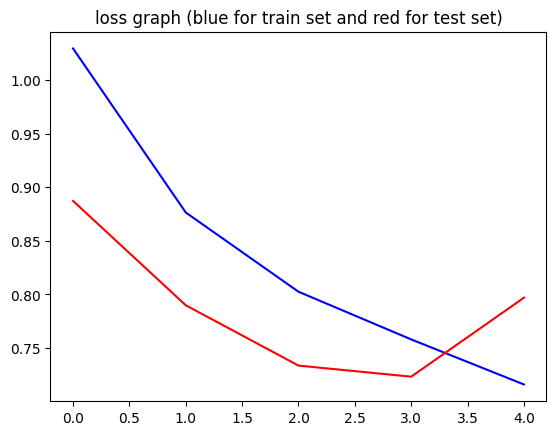

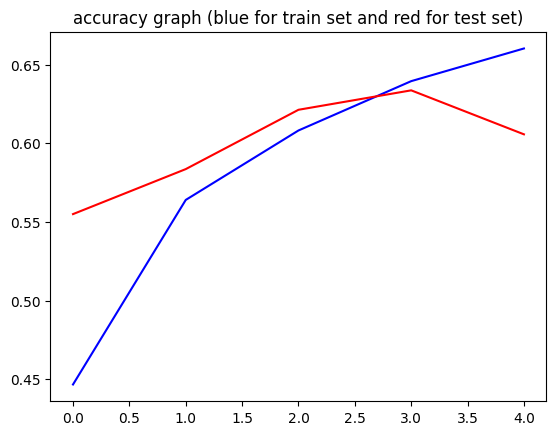

In [ ]:
x = [0, 1, 2, 3, 4]

y = training_loss_history
y2 = validation_loss_history
plt.title("loss graph (blue for train set and red for test set)")
plt.plot(x, y, color ="blue")
plt.plot(x, y2, color ="red")
plt.show()

y = training_acc_history
y2 = validation_acc_history
plt.title("accuracy graph (blue for train set and red for test set)")
plt.plot(x, y, color ="blue")
plt.plot(x, y2, color ="red")
plt.show()

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">طبق خواسته&zwnj;ی سوال، ماتریس کانفیوژن، accuracy و همچنین f1score بر روی داده&zwnj;های تست گزارش شده&zwnj;اند که آن&zwnj;ها را می&zwnj;بینیم. توجه گردد معنی و مفهوم متریک&zwnj;های ذکر شده در قسمت&zwnj;های قبلی (بخش معرفی و بررسی متریک&zwnj;های استفاده شده) آمده است.</p>
</span>
"""
HTML(text)

  0%|          | 0/13 [00:00<?, ?it/s]

test accuracy: 0.618
test f1_score:
 label 0: 0.416 - label 1: 0.674 - label 2: 0.723


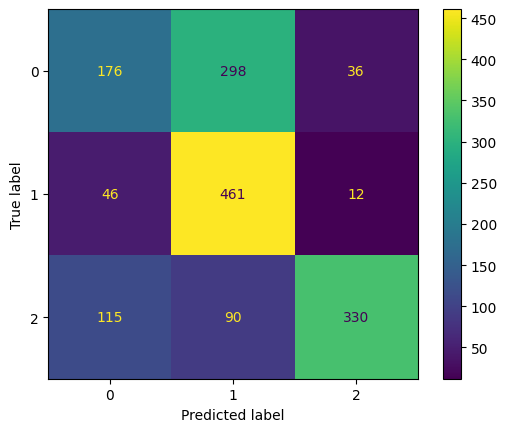

In [ ]:
model_t1.eval()
test_predicts = []
test_targets = []
with torch.no_grad():
  for inputs, labels in tqdm(test_loader):
    [test_targets.append(i) for i in labels]
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = torch.tensor(labels).to(device)    
    output = model_t1(input_ids, token_type_ids, attention_mask)
    [test_predicts.append(i) for i in output.detach().cpu().numpy().tolist()]

print('test accuracy: {:.3f}'.format(accuracy(test_targets, np.argmax(test_predicts, 1))))
print('test f1_score:\n label 0: {:.3f} - label 1: {:.3f} - label 2: {:.3f}'.format(*precision_recall_fscore_support(test_targets, np.argmax(test_predicts, 1))[2].tolist()))
plot_cmat(test_targets, np.argmax(test_predicts, 1))

# وظیفه‌ دوم

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">مانند وظیفه&zwnj;ی اول، با استفاده از کلاس تعریف شده در فوق، مدل وظیفه&zwnj;ی دوم را نیز تعریف کردیم. این بار از همه‌ی لایه‌ی مدل parsbert بهره بردیم. برای این وظیفه از خروجی pool layer parsbert استفاده کردیم (در وظیفه‌ی سوم همین مدل را با استفاده از میانگین کل hidden states ها پیاده سازی کردیم تا بتوانیم نتایج استفاده از هر حالت را مقایسه کنیم). &nbsp;شَمای مدل به شرح آتی است.</p>
</span>
"""
HTML(text)

In [ ]:
bert_t2 = AutoModel.from_pretrained(parsbert, return_dict = True)

model_t2 = custom_model(bert_t2, True)
model_t2.eval

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<bound method Module.eval of custom_model(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">این بخش دقیقا مانند بخش مشابه در وظیفه&zwnj;ی اول است با این تفاوت که مدل را برای 5 ایپاک آموزش دادیم (به دلیل همگرا شدن نتیجه&zwnj;ی مدل) و همچنین برخلاف وظیفه&zwnj;ی اول، لایه&zwnj;های parsbert را جهت fine tuning با قابلیت به روز شدن وزن&zwnj;ها تعریف کردیم.</p>
</span>
"""
HTML(text)

In [ ]:
#bert = AutoModel.from_pretrained(parsbert, return_dict = True)
#model_t2 = custom_model(bert)
model_t2 = model_t2.to(device)
for _, param in model_t2.bert.named_parameters():  
  param.requires_grad = True
  
optimizer = AdamW(model_t2.parameters(), lr=0.00003, weight_decay= 0.009)
loss_fn = nn.CrossEntropyLoss()
epochs = 5


training_loss_history = []
validation_loss_history = []
training_acc_history = []
validation_acc_history = []
for e in range(epochs):
  print('epoch: ', e + 1)
  print(' train phase: ')
  model_t2.train()
  training_loss = 0 
  targets = []   
  predicts = []
  for inputs, labels in tqdm(train_loader):
    [targets.append(i) for i in labels]
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = torch.tensor(labels).to(device)

    output = model_t2(input_ids, token_type_ids, attention_mask)
    [predicts.append(i) for i in output.detach().cpu().numpy().tolist()]
    #break
    loss = loss_fn(output, labels)
    optimizer.zero_grad()      
    loss.backward()
    optimizer.step()
    training_loss += loss.item()

  training_loss = training_loss / len(train_loader)
  training_acc_history.append(accuracy(np.argmax(predicts, 1), targets))
  #print('   epoch ',e+1 ,'train loss: ', training_loss)
  training_loss_history.append(training_loss)

  print(' validation phase: ')
  model_t2.eval()
  validation_loss = 0
  targets = []   
  predicts = []
  with torch.no_grad():
    for inputs, labels in tqdm(val_loader):
      #break
      [targets.append(i) for i in labels]
      input_ids = inputs['input_ids'].to(device)
      token_type_ids = inputs['token_type_ids'].to(device)
      attention_mask = inputs['attention_mask'].to(device)
      labels = torch.tensor(labels).to(device)

      output = model_t2(input_ids, token_type_ids, attention_mask)
      [predicts.append(i) for i in output.detach().cpu().numpy().tolist()]
      loss = loss_fn(output, labels)
      validation_loss += loss.item()
    validation_loss /= len(val_loader)
    #print('   epoch ',e+1 ,'validation loss: ', validation_loss)
    validation_loss_history.append(validation_loss)
    validation_acc_history.append(accuracy(np.argmax(predicts, 1), targets))
  
  print("epoch: ", e+1)
  print("      training loss: {:.3f}        validation loss: {:.3f}".format(training_loss_history[-1], validation_loss_history[-1]))
  print("  training accuracy: {:.3f}    validation accuracy: {:.3f}'\n\n'".format(training_acc_history[-1], validation_acc_history[-1]))



epoch:  1
 train phase: 


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/228 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/13 [00:00<?, ?it/s]

epoch:  1
      training loss: 0.813        validation loss: 0.655
  training accuracy: 0.603    validation accuracy: 0.705'

'
epoch:  2
 train phase: 


  0%|          | 0/228 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/13 [00:00<?, ?it/s]

epoch:  2
      training loss: 0.524        validation loss: 0.595
  training accuracy: 0.786    validation accuracy: 0.759'

'
epoch:  3
 train phase: 


  0%|          | 0/228 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/13 [00:00<?, ?it/s]

epoch:  3
      training loss: 0.351        validation loss: 0.651
  training accuracy: 0.861    validation accuracy: 0.769'

'
epoch:  4
 train phase: 


  0%|          | 0/228 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/13 [00:00<?, ?it/s]

epoch:  4
      training loss: 0.246        validation loss: 0.905
  training accuracy: 0.912    validation accuracy: 0.759'

'
epoch:  5
 train phase: 


  0%|          | 0/228 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/13 [00:00<?, ?it/s]

epoch:  5
      training loss: 0.181        validation loss: 0.715
  training accuracy: 0.937    validation accuracy: 0.769'

'


In [ ]:
#torch.save(model_t2.state_dict(), '/content/drive/MyDrive/NN_HW4/dump/Q1_task2_model.pth')
torch.save(model_t2.state_dict(), '/dump/Q1_task2_model.pth')

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">دو بخش آتی (نمودارهای loss و accuracy و همچنین ماتریس کانفیوژن و accuracy و f1score داده&zwnj;های تست) مثل بخش مشابه در وظیفه&zwnj;ی اول تعریف شدند. همانگونه که ملاحظه می&zwnj;گردد fine tuning و استفاده از کل لایه‌های مدل parsbert، در زمان آموزش کم&zwnj;تر، منجر به بهبود 18 درصدی دقت شد. در انتهای وظیفه&zwnj;ی سوم تاثیر استفاده از pooler layer در مقابل استفاده از کل hidden states ها نیز خواهد آمد.</p>
</span>
"""
HTML(text)

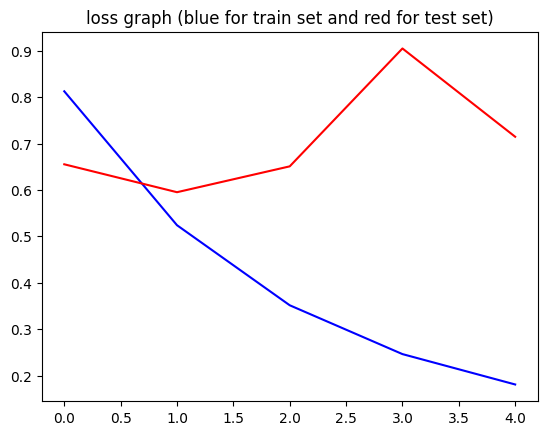

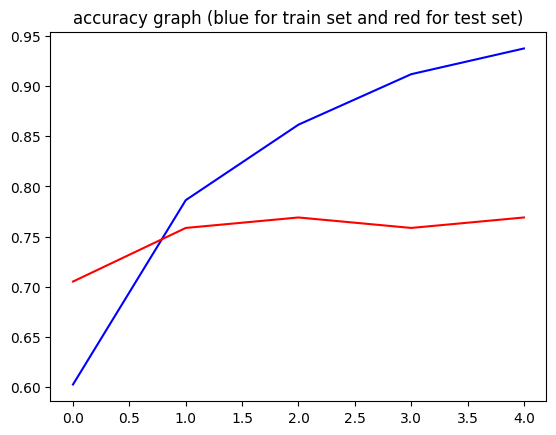

In [ ]:
x = [0, 1, 2, 3, 4]

y = training_loss_history
y2 = validation_loss_history
plt.title("loss graph (blue for train set and red for test set)")
plt.plot(x, y, color ="blue")
plt.plot(x, y2, color ="red")
plt.show()

y = training_acc_history
y2 = validation_acc_history
plt.title("accuracy graph (blue for train set and red for test set)")
plt.plot(x, y, color ="blue")
plt.plot(x, y2, color ="red")
plt.show()

  0%|          | 0/13 [00:00<?, ?it/s]

test accuracy: 0.797
test f1_score:
 label 0: 0.704 - label 1: 0.812 - label 2: 0.869


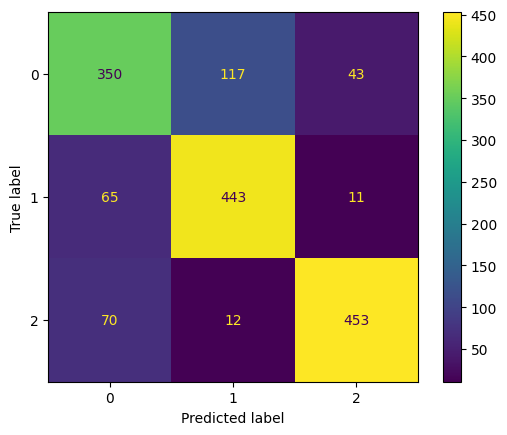

In [ ]:
model_t2.eval()
test_predicts = []
test_targets = []
with torch.no_grad():
  for inputs, labels in tqdm(test_loader):
    [test_targets.append(i) for i in labels]
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = torch.tensor(labels).to(device)    
    output = model_t2(input_ids, token_type_ids, attention_mask)
    [test_predicts.append(i) for i in output.detach().cpu().numpy().tolist()]

print('test accuracy: {:.3f}'.format(accuracy(test_targets, np.argmax(test_predicts, 1))))
print('test f1_score:\n label 0: {:.3f} - label 1: {:.3f} - label 2: {:.3f}'.format(*precision_recall_fscore_support(test_targets, np.argmax(test_predicts, 1))[2].tolist()))
plot_cmat(test_targets, np.argmax(test_predicts, 1))

# وظیفه‌ی سوم

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در این وظیفه قصد داریم تاثیر لایه‌های انکودر مدل را بسنجیم. ابتدا تعداد لایه‌های انکودر parsbert و شَمای آن‌ها را ببینیم:</p>
</span>
"""
HTML(text)

In [ ]:
#from transformers import BertModel
#bert_t3 = BertModel.from_pretrained(parsbert, return_dict = True)
bert_t3 = AutoModel.from_pretrained(parsbert, return_dict = True)
print('The number of (pars)bert layers: ',len(bert_t3.encoder.layer), '\n\n(pars)bert layers: ')
bert_t3.encoder.layer

The number of (pars)bert layers:  12 

(pars)bert layers: 


ModuleList(
  (0-11): 12 x BertLayer(
    (attention): BertAttention(
      (self): BertSelfAttention(
        (query): Linear(in_features=768, out_features=768, bias=True)
        (key): Linear(in_features=768, out_features=768, bias=True)
        (value): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (output): BertSelfOutput(
        (dense): Linear(in_features=768, out_features=768, bias=True)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (intermediate): BertIntermediate(
      (dense): Linear(in_features=768, out_features=3072, bias=True)
      (intermediate_act_fn): GELUActivation()
    )
    (output): BertOutput(
      (dense): Linear(in_features=3072, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
)

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">اکنون به شکلی که صورت سوال بیان کرده 12 مدل تعریف می‌کنیم (مدل اول با یک لایه‌ی انکودر، مدل دوم با دو لایه‌ی انکدر و...). مدل‌های تعریف شده را در یک لیست ذخیره کردیم.</p>
</span>
"""
HTML(text)

In [ ]:
multi_bert = []
all_encoders = bert_t3.encoder.layer

for i in tqdm(range(12)):
  new_encoders = nn.ModuleList()
  [new_encoders.append(all_encoders[j]) for j in range(i + 1)]

  new_model = copy.deepcopy(bert_t3)
  new_model.encoder.layer = new_encoders
  
  new_model.config.num_hidden_layers = i + 1

  multi_bert.append(new_model)

del all_encoders, bert_t3

  0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">برای مثال نتیجه‌ی بخش قبل، مدل 7 اُم (اندیس 6 اُم لیست تعریف شده در فوق) را نمایش می‌دهیم. ملاحظه می‌شود که خواسته‌ی سوال تا اینجا برآورده شده است:</p>
</span>
"""
HTML(text)

In [ ]:
multi_bert[6].config, multi_bert[6]

(BertConfig {
   "_name_or_path": "HooshvareLab/bert-base-parsbert-uncased",
   "architectures": [
     "BertForMaskedLM"
   ],
   "attention_probs_dropout_prob": 0.1,
   "classifier_dropout": null,
   "hidden_act": "gelu",
   "hidden_dropout_prob": 0.1,
   "hidden_size": 768,
   "initializer_range": 0.02,
   "intermediate_size": 3072,
   "layer_norm_eps": 1e-12,
   "max_position_embeddings": 512,
   "model_type": "bert",
   "num_attention_heads": 12,
   "num_hidden_layers": 7,
   "pad_token_id": 0,
   "position_embedding_type": "absolute",
   "transformers_version": "4.29.2",
   "type_vocab_size": 2,
   "use_cache": true,
   "vocab_size": 100000
 },
 BertModel(
   (embeddings): BertEmbeddings(
     (word_embeddings): Embedding(100000, 768, padding_idx=0)
     (position_embeddings): Embedding(512, 768)
     (token_type_embeddings): Embedding(2, 768)
     (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
     (dropout): Dropout(p=0.1, inplace=False)
   )
   (encoder): B

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">حلقه‌های train و validation را مانند وظیفه‌ی قبلی ولی به صورت یک تابع تعریف کردیم که خروجی آن نتیجه‌ی accuracy حاصل از امتحان مدل روی داده‌های test است. لازم به ذکر است که اینجا از کل خروجی‌های hidden states استفاده کردیم.</p>
</span>
"""
HTML(text)

In [ ]:
def train_multibert(model, train_loader = train_loader, val_loader = val_loader,
                    test_loader = test_loader, epochs = 7, device = device, finetune = True, 
                    report = True, plots = True, custom_optimizer = None, custom_loss_fn = None):  
  
  model = model.to(device)
  #intiate parameters
  for _, param in model.bert.named_parameters():  
    param.requires_grad = True

  if custom_optimizer is None:
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.00007, weight_decay= 0.007)
  else:
    optimizer = custom_optimizer
  
  if custom_loss_fn is None:
    loss_fn = nn.CrossEntropyLoss()
  else:
    loss_fn = custom_loss_fn
  

  #training and validation loops
  training_loss_history = []
  validation_loss_history = []
  training_acc_history = []
  validation_acc_history = []
  for e in range(epochs):
    sys.stdout = sys.__stdout__
    txt = 'epoch: ', e + 1, '/', epochs
    if not report:            
      print("\r", txt, end="")
      sys.stdout = open(os.devnull, 'w')
    print(txt)    
    print(' train phase: ')
    model.train()
    training_loss = 0 
    targets = []   
    predicts = []
    for inputs, labels in tqdm(train_loader, disable= not report):
      [targets.append(i) for i in labels]
      input_ids = inputs['input_ids'].to(device)
      token_type_ids = inputs['token_type_ids'].to(device)
      attention_mask = inputs['attention_mask'].to(device)
      labels = torch.tensor(labels).to(device)
      output = model(input_ids, token_type_ids, attention_mask)
      [predicts.append(i) for i in output.detach().cpu().numpy().tolist()]
      #break
      loss = loss_fn(output, labels)
      optimizer.zero_grad()      
      loss.backward()
      optimizer.step()
      training_loss += loss.item()
    training_loss = training_loss / len(train_loader)
    training_acc_history.append(accuracy(np.argmax(predicts, 1), targets))
    #print('   epoch ',e+1 ,'train loss: ', training_loss)
    training_loss_history.append(training_loss)    

    print(' validation phase: ')
    model.eval()
    validation_loss = 0
    targets = []   
    predicts = []
    with torch.no_grad():
      for inputs, labels in tqdm(val_loader, disable= not report):
        #break
        [targets.append(i) for i in labels]
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = torch.tensor(labels).to(device)
        output = model(input_ids, token_type_ids, attention_mask)
        [predicts.append(i) for i in output.detach().cpu().numpy().tolist()]
        loss = loss_fn(output, labels)
        validation_loss += loss.item()
      validation_loss /= len(val_loader)
      #print('   epoch ',e+1 ,'validation loss: ', validation_loss)
      validation_loss_history.append(validation_loss)
      validation_acc_history.append(accuracy(np.argmax(predicts, 1), targets))

    print("epoch: ", e+1)
    print("      training loss: {:.3f}        validation loss: {:.3f}".format(training_loss_history[-1], validation_loss_history[-1]))
    print("  training accuracy: {:.3f}    validation accuracy: {:.3f}'\n\n'".format(training_acc_history[-1], validation_acc_history[-1]))

  #sys.stdout = sys.__stdout__
  sys.stdout = jupi_stdout
  
  if plots:
    x = [i for i in range(epochs)]
    y = training_loss_history
    y2 = validation_loss_history
    plt.title("loss graph (blue for train set and red for test set)")
    plt.plot(x, y, color ="blue")
    plt.plot(x, y2, color ="red")
    plt.show()
    y = training_acc_history
    y2 = validation_acc_history
    plt.title("accuracy graph (blue for train set and red for test set)")
    plt.plot(x, y, color ="blue")
    plt.plot(x, y2, color ="red")
    plt.show()

  model.eval()
  test_predicts = []
  test_targets = []
  with torch.no_grad():
    for inputs, labels in tqdm(test_loader, disable= not report):
      [test_targets.append(i) for i in labels]
      input_ids = inputs['input_ids'].to(device)
      token_type_ids = inputs['token_type_ids'].to(device)
      attention_mask = inputs['attention_mask'].to(device)
      labels = torch.tensor(labels).to(device)    
      output = model(input_ids, token_type_ids, attention_mask)
      [test_predicts.append(i) for i in output.detach().cpu().numpy().tolist()]

  acc = accuracy(test_targets, np.argmax(test_predicts, 1))

  if plots:
    print('test accuracy: {:.3f}'.format(acc))
    print('test f1_score:\n label 0: {:.3f} - label 1: {:.3f} - label 2: {:.3f}'.format(*precision_recall_fscore_support(test_targets, np.argmax(test_predicts, 1))[2].tolist()))
    plot_cmat(test_targets, np.argmax(test_predicts, 1))
  
  return acc




In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">اکنون هر 12 مدل را آموزش می‌دهیم و accuracy حاصل از هر مدل را ذخیره می‌کنیم.</p>
</span>
"""
HTML(text)

In [ ]:
accs = []
for bert in tqdm(multi_bert):
  model = custom_model(bert, using_CLS_only= False)
  acc = train_multibert(model, train_loader = train_loader, val_loader = val_loader,
                    test_loader = test_loader, epochs = 5, device = device, finetune = True, 
                    report = False, plots = False, custom_optimizer = None, custom_loss_fn = None)
  accs.append(acc)
  del model

del multi_bert

  0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در ادامه نمودار دقت بر اساستعداد لایه‌ها آمده است. ملاحظه می‌گردد تا 5 لایه انکودر نمودار با شیب تندی صعودی است ولی از 5 لایه تا 10 لایه نمودار حالت نزولی به خود می‌گیرد و سپس مجددا روند صعودی اتخاد می‌کند.می‌توان گفت در حالت کلی، با تعداد آموزش به تعداد ایپاک‌های خیلی زیاد، شیب نمودار صعودی خواهد بود ولی در تعداد ایپاک‌های کم می‌بایست متناسب با مسئله تعداد لایه‌های انکودر را fine tune کرد و بهترین تعداد لایه‌را برگزید. همچنین نکته‌ی قابل توجه در مقایسه با وظیفه‌ی قبلی این است که در اینجا حتی با تعداد 12 لایه انکودر دقت فاصله‌ی چشم‌گیری با مدل وظیفه‌ی قبلی دارد در حالی که تمام پارامترها، به جز یک پارامتر یکسان است. در وظیفه‌ی قبلی از pooler layer به عنوان خروجی مدل parsbert استفاده کردیم ولی اینجا از کل hidden states ها استفاده کردیم. این نشان‌دهنده‌ی آن است در محیط مشابه محیط حل سوال (تعداد ایپاک، پارامترها، مدل ساده و...) pooler layer از میانگین کل hidden states ها بهتر عمل می‌کند.</p>
</span>
"""
HTML(text)

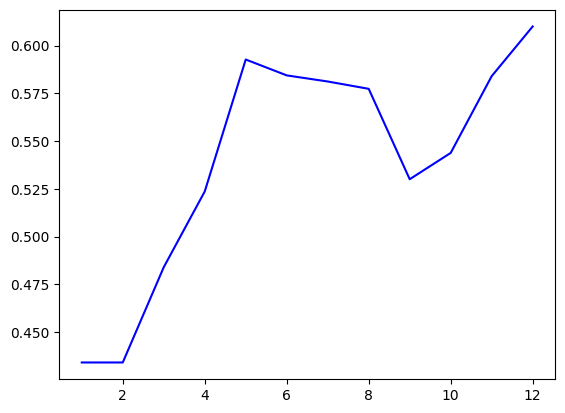

In [ ]:
###########M
x = [i+1 for i in range(len(accs))]
y = accs
plt.plot(x, y, color ="blue")

# وظیفه چهارم

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">ابتدا مطابق صورت سوال، 4 مدل parsbert ساخته می‌شوند (1- مدل parsbert اصلی 2- مدل parsbert با هرس 50% attention head های هرلایه 3- مدل parsbert با هر  67% attention head های هرلایه 4- مدل parsbert با هرس 83% attention head های هرلایه).</p>
</span>
"""
HTML(text)

In [ ]:
bert_t4 = BertModel.from_pretrained(parsbert)
#bert_t4_copy = copy.deepcopy(bert_t4)

num_of_heads = bert_t4.config.num_attention_heads # = 12
heads_to_prune_50 = dict()
heads_to_prune_67 = dict()
heads_to_prune_83 = dict()

for i in range(12): #12 = bert_t4.config.num_hidden_layers
  heads_to_prune_50[i] = random.sample(range(num_of_heads), int(0.5 * num_of_heads))
  heads_to_prune_67[i] = random.sample(range(num_of_heads), int(0.67 * num_of_heads))
  heads_to_prune_83[i] = random.sample(range(num_of_heads), int(0.83 * num_of_heads))


bert_t4_50 = copy.deepcopy(bert_t4)
bert_t4_50.prune_heads(heads_to_prune_50)

bert_t4_67 = copy.deepcopy(bert_t4)
bert_t4_67.prune_heads(heads_to_prune_67)

bert_t4_83 = copy.deepcopy(bert_t4)
bert_t4_83.prune_heads(heads_to_prune_83)



Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">برای مثال تعداد پارامترهای مدل parsbert بعد از هرس 83% attention head های هرلایه و قبل از آن آمده است. همچنین شَمای مدل بعد از حذف attention head ها نمایش داده شده است.</p>
</span>
"""
HTML(text)

In [ ]:
print('before pruning: ',sum(p.numel() for p in bert_t4.parameters()))
print('after 83% pruning: ',sum(p.numel() for p in bert_t4_83.parameters()))
print('\n\nparsbert model after 83% pruning: ')
bert_t4_83

before pruning:  162841344
after 83% pruning:  141586944


parsbert model after 83% pruning: 


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(100000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=192, bias=True)
            (key): Linear(in_features=768, out_features=192, bias=True)
            (value): Linear(in_features=768, out_features=192, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=192, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">بر مبنای هر یک از این 4 مدل parsbert، مدل وظیفه، مانند مدل‌های وظیفه‌ی سوم و با همان پارامترها، ساخته می‌شوند و سپس آن‌ها را با همان تابع آموزش وظیفه‌ی قبلی آموزش می‌دهیم. نتیجه‌ی accuracy حاصل از تست مدل روی داده‌های test ذخیره می‌گردد. </p>
</span>
"""
HTML(text)

In [ ]:

accs = []

#0% pruning
model = custom_model(bert_t4, using_CLS_only= True)
acc = train_multibert(model, train_loader = train_loader, val_loader = val_loader,
                    test_loader = test_loader, epochs = 5, device = device, finetune = True, 
                    report = False, plots = False, custom_optimizer = None, custom_loss_fn = None)
accs.append(acc)

#50% pruning
model = custom_model(bert_t4_50, using_CLS_only= True)
acc = train_multibert(model, train_loader = train_loader, val_loader = val_loader,
                    test_loader = test_loader, epochs = 5, device = device, finetune = True, 
                    report = False, plots = False, custom_optimizer = None, custom_loss_fn = None)
accs.append(acc)

#67% pruning
model = custom_model(bert_t4_67, using_CLS_only= True)
acc = train_multibert(model, train_loader = train_loader, val_loader = val_loader,
                    test_loader = test_loader, epochs = 5, device = device, finetune = True, 
                    report = False, plots = False, custom_optimizer = None, custom_loss_fn = None)
accs.append(acc)

#83% pruning
model = custom_model(bert_t4_83, using_CLS_only= True)
acc = train_multibert(model, train_loader = train_loader, val_loader = val_loader,
                    test_loader = test_loader, epochs = 5, device = device, finetune = True, 
                    report = False, plots = False, custom_optimizer = None, custom_loss_fn = None)
accs.append(acc)

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">نتایج بالا را بر اساس هر یک از 4 مدل parsbert نمایش می‌دهیم. ملاحظه می‌گردد با حذف 50% attention head ها (و حتی حذف 67% attention head های هرلایه) نتیجه  کاهش چشم‌گیری پیدا نکرد و این امر نشان می‌دهد که کارکرد بعضی از attention head ها با یکدیگر correlation دارد. </p>
</span>
"""
HTML(text)

In [ ]:
print('0% pruning accuracy: {:.3}'.format(accs[0]))
print('50% pruning accuracy: {:.3}'.format(accs[1]))
print('67% pruning accuracy: {:.3}'.format(accs[2]))
print('83% pruning accuracy: {:.3}'.format(accs[3]))

0% pruning accuracy: 0.758
50% pruning accuracy: 0.739
67% pruning accuracy: 0.721
83% pruning accuracy: 0.471


# وظیفه‌ی پنجم

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">دو نوع بایاس روی مدل را بررسی می‌نماییم. در مثال اول مشاهده می‌شود که نوعی بایاس زمانی (نسبت به زمان تهیه‌ی دیتاست) وجود دارد و پیشنهادات مربوط به یک دوره‌ی زمانی خاص هستند.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در مثال دوم نوعی دیگر از بایاس را شاهدیم. با اینکه جمله‌ی بعد از [MASK] یک مثال کلی است و به جنسیت ربطی ندارد، پیشنهادات ارائه شده، به جز ضمایر، مربوط به یک جنسیت هستند.</p>
</span>
"""
HTML(text)

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model=parsbert)
txt = "[MASK] از تورم بالا خبر داد"
result = unmasker(txt)
print(txt,': ')
print([r["token_str"] for r in result])

print('\n')

txt = "[MASK] مدال طلا گرفت"
result = unmasker(txt)
print(txt,': ')
print([r["token_str"] for r in result])

[MASK] از تورم بالا خبر داد : 
['سیف', 'نوبخت', 'جهانگیری', 'دولت', 'طیبنیا']


[MASK] مدال طلا گرفت : 
['مسی', 'رونالدو', 'او', 'عبدولی', 'وی']


# شروع پاسخ سوال دوم


In [ ]:
#@title ‎ 
from IPython.display import HTML
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800;900&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; line-height: 28pt; font-weight: 500; text-align: center;'>
<h1 style="font-family:Vazirmatn; font-weight: 800;"> پاسخ سوال دوم</h1>
<h3 dir="rtl" style="text-align: center; font-family:Vazirmatn; font-weight: 600;">(بخش مقدمه، برای هر دو سوال مشترک است و جزو گزارش هر دو به شمار می‌رود. همچنین برای اجرای کدهای هر دو سوال، به اجرای کدهای مقدمه نیاز است)</h3>
</span>
"""
HTML(text)


In [ ]:
#@title  seeds 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">مطابق خواسته‌ی سوال، seed ها را (برای کلاس random پایتنون و همچنین برای کلاس‌های فریمورک پایتورج) برابر 10 قرار می‌دهیم. همچنین در توابعی که به صورت پیشفرض از seed پشتیبانی می‌کنند نیز از seed برابر 10 استفاده می‌کنیم.</p>
</span>
"""
HTML(text)

In [ ]:
Q2_seed = 10
torch.manual_seed(Q2_seed)
random.seed(Q2_seed)

In [ ]:
#@title  Introducing, reading and analysing the dataset
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">برای معرفی این دیتاست، توضیحات سازنده&zwnj;ی آن را مستقیما می&zwnj;آوریم: "</p>
<h3 dir="auto" style="text-align: center;" tabindex="-1">SentiPers: A Sentiment Analysis Corpus for Persian</h3>
<div dir="rtl" style="padding-right: 40px; text-align: justify;">توسعه پیکره سنتی پرس حدودا از سال ۱۳۹۳ در گروه پردازش زبان طبیعی دانشگاه گیلان آغاز شد. داده های اولیه و خام سنتی پرس از وبسایت دیجی کالا استخراج و پس از دسته بندی در قالب اسناد و جملات، توسط گروهی از دانشجویان مهندسی کامپیوتر دانشگاه گیلان به صورت دستی نشانه گذاری شدند. <span style="font-size: 17px; text-align: justify;">سنتی پرس از زمان ایجاد تاکنون به صورت رایگان و با دریافت درخواست از طریق ایمیل برای همگان در دسترس بود. با وجود اینکه در طول این سالها سنتی پرس تحت گسترش و توسعه فعال نبوده و در سالهای اخیر شاهد رشد چشمگیری در تحقیقات در زمینه پردازش زبان فارسی و به ویژه تحلیل احساس، و معرفی انواع متنوعی از ابزارها و منابع بوده ایم، این پیکره همچنان به عنوان یک منبع مفید و با تعداد داده های مناسب و برچسب های منحصر به فرد مورد استفاده قرار گرفته و میتواند بگیرد. </span><span style="font-size: 17px; text-align: justify;">هدف از ایجاد این مخزن، آسان سازی هر چه بیشتر دسترسی به سنتی پرس بوده است. "</span></div>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">این دیتاست شامل 4 ستون sid، text، polarity <span>و </span>file است. ستون اول شناسه&zwnj;ی هر سطر را نشان می&zwnj;دهد. ستون دوم متن نظر و ستون سوم درجه احساسات در متن نظر (از -2 به معنای بسیار ناراضی تا +2 به معنای بسیار راضی)، و ستون آخر فایلی است که این سطر از آن برداشته شده (در دیتاست کامل فایل&zwnj;های زیادی داریم که هر فایل شامل نظرات مرتبط با یک یا چند محصول مشابه است ولی دیتاست اصلی همان است که در ادامه آن را می&zwnj;خوانیم).</p>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">اکنون دیتاست را خوانده و چند سطر از آن را نمایش می&zwnj;دهیم:</p>
</span>
"""
HTML(text)

In [ ]:
sentipers_df = pd.read_excel('/content/drive/MyDrive/NLP_UT/sentipers/sentipers.xlsx')
sentipers_df

,index,sid,text,polarity,file
0,0,rev-1,اینک قصد داریم پرینتر دیگری از پرینترهای لیزری...,0,data/main/HP LaserJet M1132.xml
1,1,rev-2,پرینتری چند کاره از رده‌ی Entry Level یا سطح م...,0,data/main/HP LaserJet M1132.xml
2,2,rev-3,به هر صورت اکنون ما در دنیایی زندگی می‌کنیم، ...,0,data/main/HP LaserJet M1132.xml
3,3,rev-4,به صورتی که توانایی کپی کردن، اسکن، فکس، پر...,0,data/main/HP LaserJet M1132.xml
4,4,rev-5,به هر صورت معمولا چیزی که بیشتر کاربران از پری...,2,data/main/HP LaserJet M1132.xml
...,...,...,...,...,...
15678,13286,-,البته نمی‌توان گفت که سیستم خنک کننده کاملا بی...,1,data/extra/Apple MacBook Pro With Retina Displ...
15679,13290,-,باتری با وجود تمام سخت افزارهای فوق‌العاده به ...,1,data/extra/Apple MacBook Pro With Retina Displ...
15680,13292,-,نرم افزار به طور پیش فرض Retina MacBook Pro از...,1,data/extra/Apple MacBook Pro With Retina Displ...
15681,13295,-,متاسفانه سایر برنامه‌ها بر روی این صفحه نمایش ...,-1,data/extra/Apple MacBook Pro With Retina Displ...


In [ ]:
#@title  some minor changes and train, test and validation split 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">برای استفاده از دیتاست، برخی اعمال را روی آن اعمال می&zwnj;کنیم.</p>
<div style="text-align: justify; padding-right: 40px;">
<ol>
<li dir="rtl" style="text-align: justify;">تمام سطرهای ستون polarity را بعلاوه&zwnj;ی 2 کردیم تا داده&zwnj;ها در بازه&zwnj;ی 0 تا 4 قرار گیرند و بتوان به راحتی در تابع loss (که در ادامه می&zwnj;آید) از آن استفاده کرد.</li>
<li dir="rtl" style="text-align: justify;">ستون&zwnj;های sid و file را حذف کردیم چرا که برای این سوال نیازی به آن&zwnj;ها نداریم.</li>
<li dir="rtl" style="text-align: justify;">با استفاده از تابع train_test_split از کتابخانه&zwnj;ی sklearn، <u>دیتاست اصلی را با نسبت 80%، 10% و 10% به ترتیب به سه دسته&zwnj;ی </u><u>train</u><u>، </u><u>test</u><u> و </u><u>validation</u><u> <span>تقسیم کردیم</span></u>. با توجه به آنکه در دیتاست اصلی داده&zwnj;های مشابه پشت سر هم بودند (مثلا نظرات در مورد یک پرینتر خاص پشت سر هم بودند)، برای کم&zwnj;تر اورفیت شدن مدل از shuffle در تقسیم داده&zwnj;ها استفاده کردیم ولی مقدار random seed <span>برای </span>shuffle <span>را برابر 10 (طبق خواسته&zwnj;ی سوال) قرار دادیم.</span></li>
</ol>
</div>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">تعداد داده&zwnj;های هر دسته از سه دسته&zwnj;ی فوق نیز نمایش داده شدند.</p>
</span>
"""
HTML(text)

In [ ]:
sentipers_df['polarity'] += 2
sentipers_df = sentipers_df.drop(['index', 'sid', 'file'], axis=1)

train_sentipers, test_sentipers = train_test_split(sentipers_df, test_size=0.2, random_state= Q2_seed, shuffle = False)
val_sentipers, test_sentipers = train_test_split(test_sentipers, test_size=0.5, random_state= Q2_seed, shuffle = False)

train_sentipers = (train_sentipers.reset_index()).drop(['index'], axis=1)
test_sentipers = (test_sentipers.reset_index()).drop(['index'], axis=1)
val_sentipers = (val_sentipers.reset_index()).drop(['index'], axis=1)

print('     train set length: {}\n      test set length: {}\nvalidation set length: {}'.format(len(train_sentipers), 
                                                                                             len(test_sentipers), 
                                                                                             len(val_sentipers)))

     train set length: 12546
      test set length: 1569
validation set length: 1568


In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">چند سطر از دسته‌ی validation را به عنوان نمونه مشاهده می‌کنیم:</p>
</span>
"""
HTML(text)

In [ ]:
val_sentipers

,text,polarity
0,در قسمت بالای آن نیز سینی دیگری بیرون می‌آید ک...,2
1,پنل بالایی از پلاستیک مشکی مات ساخته شده و این...,2
2,این در حالی است که در قسمت سمت چپ یک کنترل پنل...,2
3,بر روی بدنه‌ی این پرینتر پورت USB 2.0 هم دیده ...,2
4,کاور بالایی را که باز کنید به کارتریج دسترسی پ...,2
...,...,...
1563,• باتری باتری لیتیوم یونی 1320 میلی آمپری که د...,2
1564,ولی اگر می‌خواهید با آن موزیک گوش دهید می‌توان...,4
1565,• جمع بندی نوکیا Asha 302 یک گوشی خوش استیل و ...,3
1566,با اینکه صفحه نمایش این گوشی لمسی نیست، ولی ک...,3


In [ ]:
#@title  labels distribution in diffrent sets
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">در این قسمت توزیع هر کلاس (برچسب‌های 0 تا 4) در هر یک از دسته‌های train، test و validation آمده است. همانگونه که مشاهده می‌شود داده با برچسب 0، نسبت به سایر برچسب‌ها، بسیار کم موجود است و احتمالا در تشخیص برچسب چنین داده‌هایی اشکال پیش آید یا تشخیص آن‌ها به سختی صورت پذیرد (در حقیقت مشکل پیش آمد و برای رفع نامتوازن بودن داده‌ها از چند تکنیک استفاده کردیم که در ادامه بیان خواهند شد ولی حداقل برای تعداد ایپاک کم نتیجه‌ بهبود نیافت). </p>
</span>
"""
HTML(text)

In [ ]:
print('train set labels distibution: ')
print(np.unique(train_sentipers['polarity'].tolist(), return_counts = True))

print('\nvalidation set labels distibution: ')
print(np.unique(val_sentipers['polarity'].tolist(), return_counts = True))

print('\ntest set labels distibution: ')
print(np.unique(test_sentipers['polarity'].tolist(), return_counts = True))

train set labels distibution: 
(array([0, 1, 2, 3, 4]), array([ 173, 1275, 4854, 3937, 2307]))

validation set labels distibution: 
(array([0, 1, 2, 3, 4]), array([ 21, 172, 534, 483, 358]))

test set labels distibution: 
(array([0, 1, 2, 3, 4]), array([ 18, 127, 550, 599, 275]))


In [ ]:
#@title  Two methods for data imbalance problem
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<h3 dir="rtl" style="padding-right: 40px; text-align: justify; font-family:Vazirmatn; font-weight: 600;">بررسی دو روش برای کم کردن تاثیر نامتوازن بودن داده&zwnj;ها:</h3>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">برای رفع یا کم کردن تاثیر نامتوازن (imbalance) بودن داده&zwnj;ها دو روش بررسی شد. در هر دو روش از ضرایبی استفاده کردیم. برای هر دسته معکوس تعداد داده&zwnj;های آن دسته را به عنوان ضریب دسته در نظر گرفتیم. حال به دو روش می&zwnj;پردازیم:</p>
<div style="padding-right: 40px;">
<ul>
<li dir="rtl" style="text-align: justify;">روش 1 - استفاده از ضرایب در محاسبه&zwnj;ی loss: برای این کار ضرایب به عنوان ورودی به تابع loss داده می&zwnj;شوند (حداقل در پایتورچ)، و تابع برای حساب loss هر داده، ضریب را در مقدار loss حساب شده تاثیر می&zwnj;دهد.</li>
<li dir="rtl" style="text-align: justify;">روش 2 &ndash; oversampling: در این روش احتمال انتخاب داده در هر بچ با توجه به ضریب آن برچسب داده صورت می&zwnj;پذیرد. داده با ضریب بیشتر شانس انتخاب بیشتری دارند. همچنین امکان انتخاب مجدد یک سطر وجود دارد (داده با تعداد کم&zwnj;تر و در نتیجه ضریب بیشتر چندین مرتبه برای آموزش انتخاب می&zwnj;شوند).</li>
</ul>
</div>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">&nbsp;</p>
<h3 dir="rtl" style="padding-right: 40px; text-align: justify; font-family:Vazirmatn; font-weight: 600;">بررسی دو روش:</h3>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">متاسفانه در روش اول بسیار سریع دچار اورفیت شدیم و دقت نسبت به عدم استفاده از این روش پایین&zwnj;تر آمد ولی در روش دوم هرچند دقت کلی نسبت به عدم استفاده از هیچ یک از روش&zwnj;ها کم‌تر بود ولی شیب افزایش دقت روی داده&zwnj;های validation <span>(و </span>train) صعودی بود منتهی به دلیل محدودیت منابع و آموزش مدل به تعداد ایپاک کم، از این روش نیز صرف نظر گردید.</p>
</span>
"""
HTML(text)

In [ ]:

#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">وزن هر لیبل را (محاسبه شده با استفاده از روش ذکر شده در بالا) مشاهده می‌کنیم:</p>
</span>
"""
HTML(text)

In [ ]:
_, Q2_weights = np.unique(train_sentipers['polarity'].tolist(), return_counts = True)
Q2_weights = torch.tensor(1/Q2_weights, dtype = torch.float)
Q2_weights

tensor([0.0058, 0.0008, 0.0002, 0.0003, 0.0004])

In [ ]:
#@title text pre-processing 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<h2 style="text-align: center;font-family:Vazirmatn;  font-weight:800"> پیش‌پردازش متن</h2>
<br>
<p style="padding-right: 40px; font-size:  12pt; text-align: center;" dir="rtl">(این تابع برای پیش پردازش متون هر دو سوال به کار رفت لذا ممکن است برخی موارد نسبت به دیتاست این سوال نا مربوط به نظر برسند)</p>
<br>
<p style="padding-right: 40px; text-align: justify;" dir="rtl">برای پیش&zwnj;پردازش متن، علاوه بر آنکه تابعی تعریف شد، از کتابخانه هضم (Hazm) نیز استفاده شد. هضم کتابخانه&zwnj;ای است که برای پیش&zwnj;پردازش متون فارسی توسط شرکت roshan-ai توسعه داده شده است. برای توضیحات بیشتر در مورد این کتابخانه و همچنین مستندات آن، می&zwnj;توان به این <a href="https://www.roshan-ai.ir/hazm/docs">لینک</a> مراجعه کرد. در این تمرین صرفا از کلاس Normalizer این کتابخانه استفاده کردیم که صرفا برخی پیش&zwnj;پردازش&zwnj;های مقدماتی را انجام می&zwnj;دهد.. البته مشخص گردید که این کتابخانه هنوز دارای باگ&zwnj;هایی است لذا برخی از اعمالی که توسط تابع این کتابخانه می&zwnj;بایست صورت می&zwnj;پذیرفتند مجددا در تابع تعریف شده پیاده سازی کردیم. در مجموع، موارد زیر به عنوان پیش&zwnj;پردازش متن پیاده&zwnj;سازی شدند (اگر برای موردی از کتابخانه&zwnj;ی هضم استفاده کردیم، در پرانتز مقابل آن مورد ذکر نمودیم):</p>
<div dir="rtl" style="padding-right: 40px;">
<ul>
<li style="text-align: justify;" dir="rtl">استاندارد سازی حروف فارسی (مثلا تبدیل &laquo;ي&raquo; به &laquo;ی&raquo; یا &laquo;1&raquo; به &laquo;<span>۱&raquo; - توسط کتابخانه&zwnj;ی هضم</span>)</li>
<li style="text-align: justify;" dir="rtl">حذف برخی stopwords ها (که شامل stopwords نیستند. فایل حاوی کلمات حذف شده در پوشه&zwnj;ی attachments آمده است).</li>
<li style="text-align: justify;" dir="rtl">حذف علائم نگارشی</li>
<li style="text-align: justify;" dir="rtl">حذف عبارت&zwnj;های دعایی پس از نام ائمه&zwnj;ی اطهار علیهم السلام (مانند علیه السلام و...)</li>
<li style="text-align: justify;" dir="rtl">جایگزین کردن اعداد بزرگتر از <span>۱</span> با توکن NUM</li>
<li style="text-align: justify;" dir="rtl">حذف حروف غیر فارسی و ارقام (با استفاده از محدوده&zwnj;ی یونیکد) از جمله حذف علائمی مانن: &laquo;-&raquo;، zero-width-space و...</li>
<li style="text-align: justify;" dir="rtl">حذف اعراب&zwnj;ها (توسط کتابخانه&zwnj;ی هضم)</li>
<li style="text-align: justify;" dir="rtl">فاصله&zwnj;ی متوالی با طول بیشتر از یک را به یک فاصله (طول یک) تبدیل کردیم&nbsp;</li>
<li style="text-align: justify;" dir="rtl">همچنین <span>تکرارهای بیش از ۲ بار را به ۲ بار کاهش دادیم. مثلاً &laquo;سلاممم&raquo; را به &laquo;سلامم&raquo; تبدیل کردیم (توسط کتابخانه&zwnj;ی هضم).</span></li>
</ul>
</div>
<p style="padding-right: 40px; text-align: justify;" dir="rtl"></p>
<p style="padding-right: 40px; text-align: justify;" dir="rtl"></p>
<BR/>
<p style="padding-right: 40px; text-align: CENTER;" dir="rtl">پی‌نوشت: با توجه به اینکه از مدل‌های بزرگ زبانی استفاده می‌کنیم، بهتر بود پیش‌پردازش خاصی صورت نپذیرد و مثلا صرفا به استانداردسازی انکدهای یونیکد کاراکترها اکتفا نمود.</p>
</span>
"""
HTML(text)

In [ ]:
#stopwords_dir = '/content/drive/MyDrive/NLP_UT/fa_nonverbal_stopwords_not_include_numbers_except_1.txt'
normalizer = hazm.Normalizer()

#we didn't use tokenizer
#tokenizer = hazm.WordTokenizer(separate_emoji = True, replace_hashtags = True, replace_numbers=True,
#                               replace_emails = True, replace_ids = True, replace_links	= True) #join_verb_parts	= False
#lemmatizer = hazm.Lemmatizer()
stopwords = [normalizer.normalize(w) for w in codecs.open(stopwords_dir, encoding='utf-8').read().split('\n') if w]
def custom_preprocessing(txt):
  txt = ud.normalize('NFKD', txt).replace('...', ' . ')
  txt = ud.normalize('NFKD', txt).replace('.', ' . ')
  txt = ud.normalize('NFKD', txt).replace('!', ' ! ')
  txt = ud.normalize('NFKD', txt).replace('؟', ' . ')
  txt = ud.normalize('NFKD', txt).replace('?', ' . ')
  txt = ud.normalize('NFKD', txt).replace(' و ', ' ')
  #txt = ud.normalize('NFKD', txt).replace(' ي', '')
  #txt = ud.normalize('NFKD', txt).replace(' ی', '')    
  #txt = ud.normalize('NFKD', txt).replace('ي', 'ی')
  txt = ud.normalize('NFKD', txt).replace('(ع)', '')    
  txt = ud.normalize('NFKD', txt).replace('(ص)', '')    
  txt = ud.normalize('NFKD', txt).replace('(س)', '')        
  txt = ud.normalize('NFKD', txt).replace('علیه‌السلام', '')
  txt = ud.normalize('NFKD', txt).replace('علیه السلام', '')
  txt = ud.normalize('NFKD', txt).replace('صلوات الله علیه', '')
  txt = ud.normalize('NFKD', txt).replace('صلوات‌الله‌علیه', '')
  txt = ud.normalize('NFKD', txt).replace('علیها السلام', '')
  txt = ud.normalize('NFKD', txt).replace('علیهاالسلام', '')
  txt = ud.normalize('NFKD', txt).replace('علیها‌السلام', '')
  txt = ud.normalize('NFKD', txt).replace('سلام‌الله‌علیها', '')
  txt = ud.normalize('NFKD', txt).replace('سلام الله علیها', '')
  txt = ud.normalize('NFKD', txt).replace('سلام الله', '')
  txt = ud.normalize('NFKD', txt).replace('سلام‌الله', '')
  txt = ud.normalize('NFKD', txt).replace('ي', '')
  txt = ud.normalize('NFKD', txt).replace('ی', '')
  txt = ud.normalize('NFKD', txt).replace('\u200cي', '')
  txt = ud.normalize('NFKD', txt).replace('\u200cی', '')    
  txt = ud.normalize('NFKD', txt).replace('\u200cی', '')

  #remove  non-Arabic, non-Persian and non-numeric chars
  txt = re.sub(r'[^\u0600-\u06FF\u0750-\u077F0-9۰-۹٠-٩]', ' ', txt)  
  txt = re.sub(r'\d+', 'NUM', txt)
  txt = txt.split()
  txt = [word for word in txt if ( re.findall("[\u0621-\u064A]", word) or re.findall("[\u0600-\u06FF\s]", word) or word == '.')]  
  #del txt[0]
  ##remove stopwords
  txt = [w for w in txt if not(w in stopwords)]

  txt = [w for w in txt if len(w) > 1]

  #txt = ['۱' if (w.isnumeric() and int(w) == 1) else w for w in txt]
  #txt = ['۰' if (w.isnumeric() and int(w) == 0) else w for w in txt]
  #txt = ['NUM' if w.isnumeric() else w for w in txt]  
  txt = [w for w in txt if not(w is None) and len(w) > 1]

  txt = ' '.join(txt)
  
  txt = ud.normalize('NFKD', txt).replace(' . ', '. ')
  
  ## remove all unicode special charachters
  #txt = txt.encode('windows-1256', 'ignore').decode('windows-1256')
  
  ## remove all punctuation marks (., ?, ؟, ،, ؛ and etc.)
  txt = ''.join(c for c in txt if (c=='!' or not ud.category(c).startswith('P') or c=='.'))
  
  ### remove line break (/n) charachter
  txt = ud.normalize('NFKD', txt).replace('\n', ' ')
  #
  ### remove no break space (\xa0) charachters
  txt = ud.normalize('NFKD', txt).replace('\xa0', ' ')
  txt = ud.normalize('NFKD', txt).replace('\xad', ' ')

  ####\u200c = zero width space. replace with normal space
  txt = ud.normalize('NFKD', txt).replace('\u200a', ' ')
  txt = ud.normalize('NFKD', txt).replace('\u200b', ' ')
  txt = ud.normalize('NFKD', txt).replace('\u200c', ' ')
  txt = ud.normalize('NFKD', txt).replace('\u200d', ' ')
  txt = ud.normalize('NFKD', txt).replace('\u200e', ' ')
  txt = ud.normalize('NFKD', txt).replace('\u200f', ' ')
  

  txt = ud.normalize('NFKD', txt).replace('های', '')

  txt = re.sub(r'\s+', ' ', txt)
  return txt

In [ ]:

#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">اعمال پیش‌پردازش‌های فوق روی دسته‌های train ،test و validation:</p>
</span>
"""
HTML(text)

In [ ]:
print("Pre-processing train set: ")
for idx in tqdm(range(len(train_sentipers))):
  p = train_sentipers['text'][idx]    
  p = normalizer.normalize(p)  
  p = custom_preprocessing(p)        
  train_sentipers['text'][idx] = p
  

print("Pre-processing validation set: ")
for idx in tqdm(range(len(val_sentipers))):
  p = val_sentipers['text'][idx]    
  p = normalizer.normalize(p)  
  p = custom_preprocessing(p)        
  val_sentipers['text'][idx] = p

print("Pre-processing test set: ")
for idx in tqdm(range(len(test_sentipers))):
  p = test_sentipers['text'][idx]    
  p = normalizer.normalize(p)  
  p = custom_preprocessing(p)        
  test_sentipers['text'][idx] = p

Pre-processing train set: 


  0%|          | 0/12546 [00:00<?, ?it/s]

<ipython-input-14-0ba6c3d37702>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sentipers['text'][idx] = p


Pre-processing validation set: 


  0%|          | 0/1568 [00:00<?, ?it/s]

<ipython-input-14-0ba6c3d37702>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_sentipers['text'][idx] = p


Pre-processing test set: 


  0%|          | 0/1569 [00:00<?, ?it/s]

<ipython-input-14-0ba6c3d37702>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sentipers['text'][idx] = p


In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p style="padding-right: 40px; text-align: justify;" dir="rtl">اکنون یکی از جملات دیتاست را، قبل و بعد از اعمال پیش&zwnj;پردازش، نمایش می&zwnj;دهیم (عمل توکنایزینگ در ادامه و توسط مدل LaBSE صورت می&zwnj;پذیرد).</p>
</span>
"""
HTML(text)

In [ ]:
p = 'من حدودا يه ماهه خريدمش همه چيش عاليه تو ديجي کالا نوشته 2.3 ولي اندرويد 4.0.4 پيش فرض روش بود واي فايش مشکل داره يا خاموش نميشه يا اگر روشنه واي فاي رو سرچ نميکنه ولي همچيش واقعا عاليه '
print('Before text pre-processing: \n', p)
p = normalizer.normalize(p)  
p = custom_preprocessing(p)    
print('\nAfter text pre-processing: \n', p)

Before text pre-processing: 
 من حدودا يه ماهه خريدمش همه چيش عاليه تو ديجي کالا نوشته 2.3 ولي اندرويد 4.0.4 پيش فرض روش بود واي فايش مشکل داره يا خاموش نميشه يا اگر روشنه واي فاي رو سرچ نميکنه ولي همچيش واقعا عاليه 

After text pre-processing: 
 حدودا یه ماهه خریدمش چیش عالیه دیجی کالا نوشته اندروید فرض روش بود وای فایش مشکل داره خاموش نمیشه روشنه وای فای رو سرچ نمیکنه همچیش واقعا عالیه


In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p style="padding-right: 40px; text-align: justify;" dir="rtl">قبل از پرداختن به بخش‌های مرتبط با دیتاست و دیتالودر، توکنایزر LaBSE از سایت huggingdace دریافت کرده و آن را در متغیری ذخیره می‌کنیم. از این توکنایزر برای آن استفاده می‌کنیم که داده‌های دیتاست به شکلی مناسب برای مدل LaBSE درآیند و بر اساس همین مدل توکنایز شوند.</p>
</span>
"""
HTML(text)

In [ ]:
LaBSE_tokenizer = AutoTokenizer.from_pretrained(LaBSE)

In [ ]:
#@title dataset and dataloader
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<h2 dir='rtl', style='font-family:Vazirmatn; line-height: 28pt; font-weight: 600; padding-right: 40px; text-align: center;'>دیتاست و دیتالودر</h2>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">کلاس&zwnj;ها و توابع دیتاست و دیتالودر بسیار ساده تعریف شدند و صرفا سطرهای دیتافریم پیش&zwnj;پردازش شده را برمی&zwnj;گردانند چرا که توکنایزر LaBSE وظیفه&zwnj;ی تشخیص و تفکیک توکن&zwnj;ها و و درج توکن&zwnj;های ویژه (مانند توکن CLS، SEP، PAD و... ) را برعهده می&zwnj;گیرد. منظور از توکن&zwnj;&zwnj;های ویژه در ادامه خواهد آمد. در کل، در تابع دریافت توالی (getitem) در کلاس دیتاست، ستون text و همینطور ستون polarity <span>(</span>برچسب) هر سطر از دیتافریم به عنوان خروجی برگردانده می&zwnj;شوند. همینطور در تابع دیتالودر، از توکنایزر استفاده کردیم و با ارائه&zwnj;ی جمله&zwnj;ی text به توکنایزر (به عنوان ورودی) ، خروجی توکنایز شده&zwnj; را دریافت خواهیم کرد. البته به جز خروجی توکنایز شده خروجی&zwnj;های دیگری خواهیم داشت که در ادامه با ذکر مثال آن&zwnj;ها را بیان می&zwnj;کنیم. همچنین حداکثر تعداد توکن&zwnj;ها در خروجی را 128 تعیین کردیم. به توکن&zwnj;های هر بچ (batch)، به اندازه&zwnj;ی اختلاف طول آن&zwnj;ها با داده با بیشترین توکن، توکن PADDING اضافه می&zwnj;کنیم. این کار برای آن است که ابعاد تمام داده&zwnj;های بچ برابر گردند تا از این بابن مشکلی هنگام آموزش شبکه&zwnj;ای که در ادامه خواهد آمد نداشته باشیم. اندازه هر بچ برای هر سه دسته&zwnj;ی train،test و validation &nbsp;را برابر 32 در نظر گرفتیم. خروجی بچ شده&zwnj;ی دیتالودر نیز از نوع تنسور تورچ تعیین شد.</p>
</span>
"""
HTML(text)

In [ ]:
from torch.utils.data import Dataset

Q2_sampler = [0] * len(train_sentipers)
for idx, label in enumerate(train_sentipers['polarity']):
  Q2_sampler[idx] = Q2_weights[label]
Q2_sampler = torch.tensor(Q2_sampler, dtype = torch.float)
Q2_sampler = torch.utils.data.sampler.WeightedRandomSampler(Q2_sampler, len(Q2_sampler))


class Q2_custom_dataset(Dataset):
    def __init__(self, df):
      self.df = df
      
    def __len__(self):
      return len(self.df)
    
    def __getitem__(self, index):
      return self.df['text'][index], self.df['polarity'][index]

Q2_train_ds = Q2_custom_dataset(train_sentipers)
Q2_valid_ds = Q2_custom_dataset(val_sentipers)     
Q2_test_ds = Q2_custom_dataset(test_sentipers)

LaBSE_tokenizer = AutoTokenizer.from_pretrained(LaBSE)
def Q2_custom_collator(data, tokenizer):
  p, label = zip(*data)
  output = tokenizer(p, padding= True, truncation= True, max_length= 128, return_tensors= 'pt')
  return output, label
Q2_train_loader = DataLoader(Q2_train_ds, collate_fn=lambda data: Q2_custom_collator(data, LaBSE_tokenizer), batch_size=32, shuffle=True, num_workers=2, pin_memory=True)#, sampler= Q2_sampler)
Q2_val_loader = DataLoader(Q2_valid_ds, collate_fn=lambda data: Q2_custom_collator(data, LaBSE_tokenizer), batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
Q2_test_loader = DataLoader(Q2_test_ds, collate_fn=lambda data: Q2_custom_collator(data, LaBSE_tokenizer), batch_size=32, shuffle=True, num_workers=2, pin_memory=True)

In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style='padding-right: 40px;'>خروجی دیتاست را مشاهده می‌کنیم. همانطور که ملاحظه می&zwnj;گردد خروجی تابع دریافت داده (getitem) از کلاس دیتاست شامل دو داده است که به ترتیب متن نظر (text) و برچسب (polarity) هستند.</span></p>
</span>
"""
HTML(text)

In [ ]:
next(iter(Q2_test_ds))

('ضمن موزیک پلیر گوشی امکان پخش ساعت موسیقی بار شارژ مزیت مثبت گوشی محسوب می گردد',
 3)

In [ ]:
#@title ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در ادامه خروجی دیتالودر را بررسی می&zwnj;کنیم. برای سادگی بررسی، یک دیتالودر با اندازه&zwnj;ی بچ برابر با ۲ تعریف کردیم. دیتالود دو خروجی دارد. یک خروجی به شکل دیکشنری و دیگری به شکل تاپل. خروجی دوم شامل برچسب&zwnj;های عبارت&zwnj;های هر بچ است. خروجی اول عبارت&zwnj;های ورودی (متن&zwnj;ها) را به شکل مناسب برای ورودی مدل parsbert در آورده است. در حقیقت دیکشنری این خروجی شامل سه ردیف است که اندکی بعد آن&zwnj;ها را بیان می&zwnj;کنیم. ابتدا ورودی متن (داده&zwnj;های ستون text دیتاست) در دیتالودر توکنایز می&zwnj;گردد.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">&nbsp;</p>
<div style="padding-right: 40px;">
<ul>
<li dir="rtl" style="text-align: justify;">در ردیف اول خروجی دیتالودر (دیکشنری) با input_ids مواجهیم. این ردیف در حقیقت همان توکن&zwnj;های به دست آمده را نشان می&zwnj;دهد منتهی هر توکن را به id عددی آن جایگزین کرده است. در (parsbert <span>و سایر مدل&zwnj;های</span> bert محور) برای هر توکن&zwnj;شناسه&zwnj;ی عددی در نظر می&zwnj;گیرند که همان id است. اگر توکنی در مدل فاقد id باشد، id توکنِ UNK (یا مانند آن) توسط مدل برای آن کلمه استفاده می&zwnj;گردد. برای بررسی بیشتر، بعد از خروجی&zwnj;های دیتالودر، یک متن توکنایز شده را قبل از تبدیل شدن به id <span>های عددی نمایش می&zwnj;دهیم.</span></li>
<li dir="rtl" style="text-align: justify;">سطر دوم دیکشنری token_type_ids نام دارد. در حقیقت بیان &zwnj;کند هر توکن در سطر قبلی متعلق به کدام جمله یا متن است. منظور از جمله یا متن آن است که اگر فرضا در دیتاست دو ستون حاوی متن داشتیم (مثلا یک ستون حاوی متن یک سوال و ستون دیگر جواب آن سوال)، هر یک از این ستون&zwnj;ها را متنی جدا در نظر بگیریم. از آن&zwnj;جا که در این دیتاست صرفا یک ستون متنی داریم که می&zwnj;بایست استفاده کنیم، تمام عناصر این ورودی برابر یک مقدار یکسان (0) خواهند بود.</li>
<li dir="rtl" style="text-align: justify;">سطر سوم دیکشنری attention_mask نام دارد که یک لیست دیگر از ۰ها و ۱&zwnj;ها است. همانگونه که در بخش&zwnj;های قبی ذکر شد، برای یکسان سازی طول جملات هر بچ از PADDING استفاده می&zwnj;کنیم. طول این لیست با طول لیست توکن&zwnj;ها برابر است. ۰های این لیست نمایانگر وجود PADDING در اندیس معادل در لیست توکن&zwnj;ها (input_ids) هستند.</li>
</ul>
</div>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">&nbsp;</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">اکنون به بررسی دقیق&zwnj;تر خروجی توکنایزر با یک مثال می&zwnj;پردازیم. به خروجی متنی دقت کنید. این خروجی در حقیقت خروجی توکنایزر است. توکن [CLS] در ابتدای همه&zwnj;ی توکن قرار می&zwnj;گیرد و به معنی شروع توالی توکن&zwnj;ها است (البته کاربردهای دیگری هم دارد). سپس متن نظر به صورت توکنایز شده آمده و بعد توکن [SEP] را می&zwnj;بینیم که به معنی پایان جمله (یا تفکیک کننده&zwnj;ی یک جمله&zwnj; یا متن از جمله&zwnj; یا متن بعدی) است. علاوه بر این&zwnj;ها، در صورت نیاز توکن یا توکن&zwnj;های [PAD] به معنای PADDING (و با هدفی که قبلا گفته شد) می&zwnj;آیند.</p>
</span>
"""
HTML(text)

In [ ]:
tmp_dl = DataLoader(Q2_test_ds, collate_fn=lambda data: Q2_custom_collator(data, LaBSE_tokenizer), batch_size=2, shuffle=True, num_workers=2)
temp_dl_output = next(iter(tmp_dl))
print(temp_dl_output)
print(LaBSE_tokenizer.convert_ids_to_tokens(temp_dl_output[0]['input_ids'][1].tolist()))
del tmp_dl, temp_dl_output

({'input_ids': tensor([[   101, 243238,    102,      0,      0,      0,      0],
        [   101, 137714,  34092, 172469,  60499, 104373,    102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1]])}, (2, 2))
['[CLS]', 'امیدوارم', 'گوشی', 'سرنوشت', 'دچار', 'نشود', '[SEP]']


In [ ]:

#@title  Introduction and analysis of used metrics
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<h2 style="text-align:center; font-weight: 800; font-family:Vazirmatn;"> معرفی و بررسی متریک‌های استفاده شده</h2>
<p dir="rtl" style="text-align: justify; padding-right: 40px;"></p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">ابتدا به بررسی متریک&zwnj;های استفاده شده در سوال می&zwnj;پردازیم. برای تعریف متریک&zwnj;ها نیاز است چند متغیر تعریف کنیم. فرض کنیم دیتاستی در اختیار داریم که از چند نوع کلاس داده در آن ذخیره شده باشد و می&zwnj;خواهیم عمل classification را بر روی این دیتاست اعمال کنیم. کلاسی که می&zwnj;خواهیم متریک&zwnj;ها را بر اساس آن محاسبه کنیم، کلاس positive و بقیه را کلاس negative در نظر می&zwnj;گیریم. حال به تعریف متغیرها می&zwnj;پردازیم:</p>
<div style = "padding-right: 40px;">
<ul>
<li style="text-align: justify;" dir="rtl">TP یا True Positive بیانگر تعداد داده&zwnj;هایی هستند که به درستی positive پیش&zwnj;بینی شدند (برچسب واقعی آن&zwnj;ها نیز positive<span>&nbsp;</span><span>است).</span></li>
<li style="text-align: justify;" dir="rtl">TN یا True Negative<span>&nbsp;</span><span>تعداد داده&zwnj;هایی را نشان می&zwnj;دهد که به درستی&nbsp;</span>positive پیش&zwnj;بینی نشدند (برچسب واقعی آن&zwnj;ها نیز positive<span>&nbsp;</span><span>نیست).</span></li>
<li style="text-align: justify;" dir="rtl">FP یا False Positive<span>&nbsp;</span><span>نشانگر تعداد داده&zwnj;هایی است که به اشتباه&nbsp;</span>positive پیش&zwnj;بینی شدند (ولی برچسب واقعی آن&zwnj;ها positive نبود).</li>
<li style="text-align: justify;" dir="rtl">FN یا False Negative<span>&nbsp;</span><span>تعداد داده&zwnj;هایی را بیان می&zwnj;کند که به اشتباه&nbsp;</span>positive پیش&zwnj;بینی نشدند (درحالی که برچسب واقعی آن&zwnj;ها positive بود).</li>
</ul>
</div>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">&nbsp;</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">حال به تعریف متریک&zwnj;ها می&zwnj;پردازیم.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">Accuracy <span>یا دقت: نسبت تعداد داده&zwnj;هایی که کلاس آن&zwnj;ها به درستی پیش&zwnj;بینی شد به تعداد کل داده&zwnj;ها را نشان می&zwnj;دهد. این متریک از پر استفاده&zwnj;ترین متریک&zwnj;ها است ولی نتیجه&zwnj;ی بسیار جامعی را ارائه می&zwnj;دهد و خیلی از اوقات شهود مناسبی از مدل نمی&zwnj;دهد. به عنوان مثال مدلی را در نظر بگیرد که قرار است برای تشخیص یک بیماری خطرناک به کار رود و عمل غربالگری تعداد بالایی از افراد را برعهده گیرد. در چنین مسئله&zwnj;ای تشخیص بیمار بودن افراد بیمار نسبت به سالم بودن افراد سالم بسیار مهم&zwnj;تر است حتی اگر بعضی از افراد سالم نیز بیمار تشخیص داده شوند (چرا که در آزمایش&zwnj;های بعدی می&zwnj;توان به سالم بودن فرد پی برد ولی اگر فرد بیمار به اشتباه سالم تشخیص داده شود، آن فرد سرمست از اینکه فکر می&zwnj;کند واقعا سالم است دیگر آزمایش&zwnj;های بعدی را اتخاذ نمی&zwnj;کند). فرض کنید 99000 فرد سالم و 1000 فرد بیمار در دیتاست ما وجود داشته باشند. اگر مدل تمام داده&zwnj;ها را، فارغ از هر چیز دیگری، سالم تشخیص دهد </span>accuracy <span>برابر با 99% حاصل می&iexcl;گردد که در حالت کلی مقدار خیلی خوبی به نظر می&zwnj;رسد ولی در واقع شهود کافی از مدل را ارائه نداده است. برای رفع این مشکل متریک&zwnj;های دیگری، که در ادامه خواهیم آورد، تعریف شدند. برای حالت&zwnj;هایی که بیش از دو کلاس داریم می&zwnj;بایست این متریک&zwnj;ها برای هر کلاس به صورت مستقل حساب شوند (هر بار یکی از کلاس&zwnj;ها را </span>positive و بقیه را negative در نظر می&zwnj;گیریم). البته برای حالت&zwnj;های بیشتر از دو کلاس روش&zwnj;هایی وجود دارند که نتیجه&zwnj;ی آن&zwnj;ها به یک مقدار واحد می&zwnj;انجامد ولی از آن&zwnj;ها استفاده نمی&zwnj;کنیم و از بیان آن&zwnj;ها در این گزارش اجتناب می&zwnj;نماییم.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">Precision: این متریک از فرمول زیر حساب می&zwnj;گردد.</p>
<p dir="rtl" style="padding-right: 40px;"><img src="https://s6.uplod.ir/i/01094/5gcomjvven1c.png" alt="Precision" style="display: block; margin-left: auto; margin-right: auto;" /></p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در حقیقت بیانگر تعداد داده&zwnj;هایی است که به درستی positive <span>پیش&zwnj;بینی شدند نسبت به کل داده&zwnj;&zwnj;هایی که (به درست یا غلط) </span>positive <span>پیش&zwnj;بینی شده&zwnj;اند. این متریک مواقعی مهم&zwnj;تر است که نخواهیم هیچ داده&zwnj;ای به اشتباه </span>positive دسته بندی شود.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">Recall: با فرمول آتی حساب می&zwnj;گردد.</p>
<p dir="rtl" style="padding-right: 40px;"><img src="https://s6.uplod.ir/i/01094/ey0snz81uh09.png" alt="recall" width="385" height="140" style="display: block; margin-left: auto; margin-right: auto;" /></p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در حقیقت بیانگر نسبت تعداد داده&zwnj;هایی است که به درستی positive <span>پیش&zwnj;بینی شدند به کل داده&zwnj;&zwnj;هایی که برچسب واقعی آن&zwnj;ها </span>positive است. مواقعی که تشخیص درست تمام داده&zwnj;های positive مهم&zwnj;تر باشد از این متریک استفاده می&zwnj;کنیم.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">&nbsp;</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">F1_score: از فرمول زیر حساب می&zwnj;شود و در حقیت نوعی میانگین برای دو متریک قبلی است.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;"><img src="https://s6.uplod.ir/i/01094/0rrvha1xikvl.png" alt="f1_score" width="780" height="130" style="display: block; margin-left: auto; margin-right: auto;" /></p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">&nbsp;</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">Confusion matrix: در این ماتریس به تعداد کلاس&zwnj;ها سطر و ستون داریم. خانه&zwnj;ی (i, j) از این ماتریس نشان دهنده&zwnj;ی تعداد داده&zwnj;هایی است که برچسب واقعی آن&zwnj;ها i است و برچسب پیش&zwnj;بینی شده برای آن&zwnj;ها j است. نمونه&zwnj;ی این ماتریس در پاسخ سوالات تمرین خواهد آمد.</p>
</span>
"""
HTML(text)

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p style="text-align: justify; padding-right: 40px;" dir="rtl">در ادامه تابعی برای محاسبه accuracy و همچنین تابعی دیگر برای رسم confusion matrix تعریف می&zwnj;کنیم. برای محاسبه f1 score، recall و precision از تابع آماده&zwnj;ی موجود در کتابخانه sklearn استفاده میکنیم.</p>
</span>
"""
HTML(text)

In [ ]:
def accuracy(target, predict):  
  if len(predict) != len(target):
    raise Exception("prediction set and target set are not at the sane length.")        
  return len([1 for i in np.array(predict) == target if i])/len(target)

#precision_recall_fscore_support

def plot_cmat(target, predict, return_confusion_matrix = False):
  confusion_matrix = metrics.confusion_matrix(target, predict)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
  cm_display.plot()
  plt.show()
  if return_confusion_matrix:
    return confusion_matrix
  return None

In [ ]:
#@title  LaBSE 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">مدل LaBSE (Language-agnostic BERT Sentence Embedding) مدلی غیر وابسته به زبان (چند زبانه و بین زبانی) است که توسط Google توسعه داده شده. این مدل بر اساس ساختار BERT (Bidirectional Encoder Representations from Transformers) <span>و به هدف تولید امبدینگ قدرتمند از کلمات کلیه&zwnj;ی زبان&zwnj;ها طراحی شده است و برای وظایف مختلف حوزه&zwnj;ی </span>nlp می&zwnj;تواند استفاده شود.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">همانگونه که بیان شد، بر خلاف مدل&zwnj;های سنتی که برای یک زبان واحد (یا چند زبان محدود) توسعه یافتند، مدل LaBSE قادر به نمایش جملات در چندین زبان با استفاده از یک مدل است. این ویژگی باعث می&zwnj;شود که LaBSE در وظایفی که دیتاست آن&zwnj;ها حاوی جملات از چندین زبان یا یک جمله به چند زبان هستند، بسیار مفید واقع گردد. علاوه بر این، مدل LaBSE برای کلمات خارج از دامنه (out of vocabulary) و کلمات بسیار نادر نیز خوب عمل می&zwnj;کند در حالی که اینگونه کلمات جزو چالش&zwnj;های مدل&zwnj;های تک زبانی (یا وابسته به چند زبان محدود) هستند.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در کل LaBSE <span>نسبت به بسیاری از مدل&zwnj;ها توانسته امتیازهای بسیار بهتری در انجام وظایف مختلف کسب کند.</span></p>
</span>
"""
HTML(text)

In [ ]:
#@title  ‎ 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در این مرحله مدل از پیش آموزش دیده شده&zwnj;ی LaBSE را از huggingface <span>دریافت می&zwnj;کنیم و سپس شَمای مدل را نمایش می&zwnj;دهیم. همانگونه که مشاهده می‌شود، این مدل نیز bert پایه است.  مدل از یک لایه&zwnj;ی امبدینگ و سپس 12 لایه&zwnj;ی ترنسفورمر انکدینگ و در نهایت یک لایه&zwnj;ی </span>pooling تشکیل شده است.</p>
</span>
"""
HTML(text)

In [ ]:
configuration = AutoConfig.from_pretrained(LaBSE)
configuration.hidden_dropout_prob = 0.13
configuration.attention_probs_dropout_prob = 0.13

LaBSE_model = BertModel.from_pretrained(pretrained_model_name_or_path = LaBSE, config = configuration)
LaBSE_model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(501153, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.13, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.13, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.13, inplace=False

In [ ]:
#@title  defined model 
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در قسمت بعدی به تعریف مدل این سوال می&zwnj;پردازیم. لایه&zwnj;ی اول مدل، یک مدل bert (در این سوال LaBSE) است. ورودی این لایه (ورودی کل مدل) امبد توالی توکنایز شده (که در دیتالودر توسط توکنایزر LaBSE توکنایز شد) است. البته لایه&zwnj;ی bert خود شامل چندین لایه&zwnj;ی دیگر است که در بالا (هنگام نمایش شَمای مدل LaBSR) آن&zwnj;ها را مشاهده کرده و به صورت مختصر بیان نمودیم. زیر لایه&zwnj;ی خروجی این مدل را می&zwnj;توان به دو صورت در نظر گرفت. حالت اول استفاده از خروجی hidden state مدل برت است که به اندازه&zwnj;ی توکن&zwnj;های ورودی، شامل وکتور به اندازه&zwnj;ی 768 است (768 مقدار پیش&zwnj;فرض برای مدل&zwnj;های bert است. این مقدار را می&zwnj;توان کوچک&zwnj;تر یا بزرگ&zwnj;تر در نظر گرفت). خروجی دیگر pool layer نام دارد و در حقیقت اولین وکتور hidden state به شمار می&zwnj;رود. از این وکتور اغلب برای مسائل classification استفاده می&zwnj;شود و برای این دست مسائل آموزش می&zwnj;یابد. این وکتور را خروجی CLS &nbsp;<span>نیز می&zwnj;نامند. البته توصیه می&zwnj;شود در صورت امکان و داشتن زمان و منابع برای آموزش با تعداد بالای ایپاک، از تمام</span> hidden state برای classification بهره برد. با توجه به منابع و زمان محدود، در این سوال صرفا از خروجی pooler layer <span>استفاده نمودیم. همچنین لازم به ذکر است مقدار </span>dropout <span>در لایه&zwnj;های </span>bert <span>(</span>LaBSE) را برابر 13% قرار دادیم.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">پس از لایه&zwnj;ی bert، از یک لایه&zwnj;ی خطی با تابع فعال ساز ReLU جهت گسترش فضای برداری خروجی bert تعریف کردیم و سپس دو لایه&zwnj;ی خطی برای کاهش تدریجی ابعاد در نظر گرفتیم. فعال ساز لایه&zwnj;ی خطی دوم نیز ReLU در نظر گرفته شد و خروجی لایه&zwnj;ی خطی آخر را از softmax عبور دادیم (در حقیقت به صورت خودکار توسط تابع هزینه&zwnj;ی crossentropy پایتورچ صورت می&zwnj;پذیرد). همچنین دو لایه&zwnj;ی dropout <span>اضافه (برای </span>drop کردن 7% نورون&zwnj;ها) روی خروجی دو لایه&zwnj;ی خطی اول استفاده کردیم.</p>
<p dir="rtl" style="text-align: justify; padding-right: 40px;"> در ادامه شَمای معماری این مدل نیز خواهد آمد.</p>
</span>
"""
HTML(text)

In [ ]:
class Q2_custom_model(nn.Module):
  def __init__(self, bert):
    super(Q2_custom_model, self).__init__()       
    self.bert = bert   
    self.expnader = nn.Linear(bert.config.to_dict()['hidden_size'], 2048)
    self.dropout_expnader = nn.Dropout(0.07)    
    self.shrinker = nn.Linear(2048, 512)
    self.dropout_shrinker = nn.Dropout(0.07)    
    self.classifier = nn.Linear(512, 5)
    self.relu = nn.ReLU()
  def forward(self, input_ids, token_type_ids, attention_mask):
    output = self.bert(input_ids= input_ids, token_type_ids= token_type_ids, attention_mask= attention_mask)    
    output = output['pooler_output']
    output = self.relu((self.expnader(output)))
    output = self.relu(self.shrinker(self.dropout_expnader(output)))
    output = self.classifier(self.dropout_shrinker(output))    
    return output

In [ ]:
#@title model parameters and training (and validation) loop
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">اکنون پارامترهای آموزش مدل تعریف می&zwnj;شوند. در این سوال از تابع هزینه&zwnj;ی cross entropy و آپتیمایزر Adam استفاده کردیم. در آپتیمایزر ضریب یادگیری را برابر 14e-5 قرار دادیم. همچنین از رگولاریسیون L2 بهره برده و ضریب هزینه&zwnj;ی وزن&zwnj;ها را 5e-5 <span>در نظر گرفتیم. همچنین در همین بخش امکان به روز شدن وزن&zwnj;های مدل</span>LaBSE &nbsp;<span>را نیز در در نظر گرفتیم </span>(fine tuning). بعد از تعریف پارامترها حلقه&zwnj;ی train و validation را تعریف کرده و به ازای 5 ایپاک حلقه را اجرا کردیم. نتیجه&zwnj;ی حاصل (مقادیر loss و accuracy) بعد از هر ایپاک گزارش شده است. همچنین قبل از train <span>شَمای مدل را نمایش دادیم.</span></p>
</span>
"""
HTML(text)

In [ ]:
Q2_optimizer = torch.optim.AdamW(LaBSE_model.parameters(), lr= 0.000014, weight_decay= 0.00005)
Q2_loss_fn = nn.CrossEntropyLoss()
Q2_loss_fn = Q2_loss_fn.to(device)
epochs = 5
Q2_model = Q2_custom_model(LaBSE_model)
for _, param in Q2_model.bert.named_parameters():  
  param.requires_grad = True
Q2_model = Q2_model.to(device)

Q2_model

Q2_custom_model(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(501153, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.13, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.13, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:
training_loss_history = []
validation_loss_history = []
training_acc_history = []
validation_acc_history = []
for e in range(epochs):
  print('epoch: ', e + 1)
  print(' train phase: ')
  Q2_model.train()
  training_loss = 0 
  targets = []   
  predicts = []
  for inputs, labels in tqdm(Q2_train_loader):
    [targets.append(i) for i in labels]
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = torch.tensor(labels).to(device)    
    output = Q2_model(input_ids, token_type_ids, attention_mask)
    [predicts.append(i) for i in output.detach().cpu().numpy().tolist()]        
    loss = Q2_loss_fn(output, labels)    
    Q2_optimizer.zero_grad() 
    loss.backward()
    Q2_optimizer.step()
    training_loss += loss.item()

  training_loss = training_loss / len(Q2_train_loader)
  training_acc_history.append(accuracy(np.argmax(predicts, 1), targets))
  #print('   epoch ',e+1 ,'train loss: ', training_loss)
  training_loss_history.append(training_loss)

  print(' validation phase: ')
  Q2_model.eval()
  validation_loss = 0
  targets = []
  predicts = []
  with torch.no_grad():
    for inputs, labels in tqdm(Q2_val_loader):
      #break
      [targets.append(i) for i in labels]
      input_ids = inputs['input_ids'].to(device)
      token_type_ids = inputs['token_type_ids'].to(device)
      attention_mask = inputs['attention_mask'].to(device)
      labels = torch.tensor(labels).to(device)
      output = Q2_model(input_ids, token_type_ids, attention_mask)
      [predicts.append(i) for i in output.detach().cpu().numpy().tolist()]
      loss = Q2_loss_fn(output, labels)
      validation_loss += loss.item()
    validation_loss /= len(Q2_val_loader)
    #print('   epoch ',e+1 ,'validation loss: ', validation_loss)
    validation_loss_history.append(validation_loss)
    validation_acc_history.append(accuracy(np.argmax(predicts, 1), targets))
  
  print("epoch: ", e+1)
  print("      training loss: {:.3f}        validation loss: {:.3f}".format(training_loss_history[-1], validation_loss_history[-1]))
  print("  training accuracy: {:.3f}    validation accuracy: {:.3f}\n\n".format(training_acc_history[-1], validation_acc_history[-1]))



epoch:  1
 train phase: 


  0%|          | 0/393 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/49 [00:00<?, ?it/s]

epoch:  1
      training loss: 1.239        validation loss: 1.092
  training accuracy: 0.543    validation accuracy: 0.636


epoch:  2
 train phase: 


  0%|          | 0/393 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/49 [00:00<?, ?it/s]

epoch:  2
      training loss: 1.013        validation loss: 1.018
  training accuracy: 0.670    validation accuracy: 0.659


epoch:  3
 train phase: 


  0%|          | 0/393 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/49 [00:00<?, ?it/s]

epoch:  3
      training loss: 0.932        validation loss: 0.990
  training accuracy: 0.710    validation accuracy: 0.658


epoch:  4
 train phase: 


  0%|          | 0/393 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/49 [00:00<?, ?it/s]

epoch:  4
      training loss: 0.873        validation loss: 0.975
  training accuracy: 0.745    validation accuracy: 0.673


epoch:  5
 train phase: 


  0%|          | 0/393 [00:00<?, ?it/s]

 validation phase: 


  0%|          | 0/49 [00:00<?, ?it/s]

epoch:  5
      training loss: 0.833        validation loss: 0.966
  training accuracy: 0.768    validation accuracy: 0.677




In [ ]:
#@title  loss and accuracy graph (per epoch)
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">بعد از آموزش مدل، نمودارهای loss و accuracy را به ازای هر ایپاک و برای داده&zwnj;های train و validation رسم کردیم که نتیجه به شکل آتی است.</p>
</span>
"""
HTML(text)

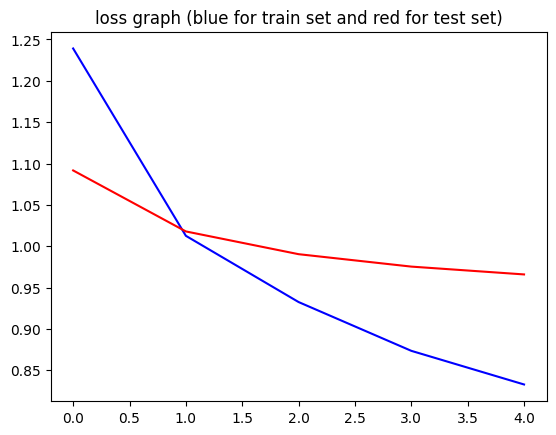

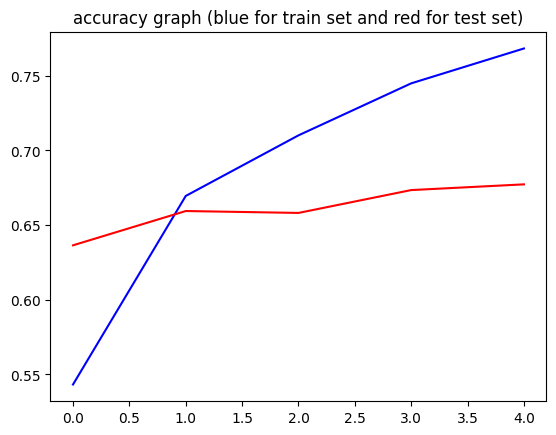

In [ ]:
x = [0, 1, 2, 3, 4]

y = training_loss_history
y2 = validation_loss_history
plt.title("loss graph (blue for train set and red for test set)")
plt.plot(x, y, color ="blue")
plt.plot(x, y2, color ="red")
plt.show()

y = training_acc_history
y2 = validation_acc_history
plt.title("accuracy graph (blue for train set and red for test set)")
plt.plot(x, y, color ="blue")
plt.plot(x, y2, color ="red")
plt.show()

In [ ]:
#@title  confusion matrix, accuracy, f1score, recall and precision for test set
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">طبق خواسته&zwnj;ی سوال، ماتریس کانفیوژن، accuracy، recall، precision <span>و همچنین</span> f1score بر روی داده&zwnj;های تست گزارش شده&zwnj;اند که آن&zwnj;ها را می&zwnj;بینیم.</p>
<br>
<p dir="rtl" style="padding-right: 40px; font-weight: 600; text-align: center;"><strong>توجه گردد معنی، مفهوم &nbsp;و شیوه&zwnj;ی تفسیر متریک&zwnj;های ذکر شده در قسمت&zwnj;های قبلی، در بخش معرفی و بررسی متریک&zwnj;های استفاده شده (Introduction and analysis of used metrics) آمده است.</strong></p>
</span>
"""
HTML(text)

In [ ]:
Q2_model.eval()
test_targets = []
test_predicts = []
with torch.no_grad():
  for inputs, labels in tqdm(Q2_test_loader):
    [test_targets.append(i) for i in labels]
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = torch.tensor(labels).to(device)    
    output = Q2_model(input_ids, token_type_ids, attention_mask)
    [test_predicts.append(i) for i in output.detach().cpu().numpy().tolist()]

print('test accuracy: {:.3f}'.format(accuracy(test_targets, np.argmax(test_predicts, 1))))
pre, rec, f1s, _ = precision_recall_fscore_support(test_targets, np.argmax(test_predicts, 1), zero_division = 0)

print('test precision:\n label 0: {:.3f} - label 1: {:.3f} - label 2: {:.3f} - label 3: {:.3f} - label 4: {:.3f}'.format(*pre.tolist()))
print('test recall:\n label 0: {:.3f} - label 1: {:.3f} - label 2: {:.3f} - label 3: {:.3f} - label 4: {:.3f}'.format(*rec.tolist()))
print('test f1_score:\n label 0: {:.3f} - label 1: {:.3f} - label 2: {:.3f} - label 3: {:.3f} - label 4: {:.3f}'.format(*f1s.tolist()))


  0%|          | 0/50 [00:00<?, ?it/s]

test accuracy: 0.679
test precision:
 label 0: 0.000 - label 1: 0.620 - label 2: 0.751 - label 3: 0.634 - label 4: 0.659
test recall:
 label 0: 0.000 - label 1: 0.693 - label 2: 0.785 - label 3: 0.669 - label 4: 0.527
test f1_score:
 label 0: 0.000 - label 1: 0.654 - label 2: 0.768 - label 3: 0.652 - label 4: 0.586


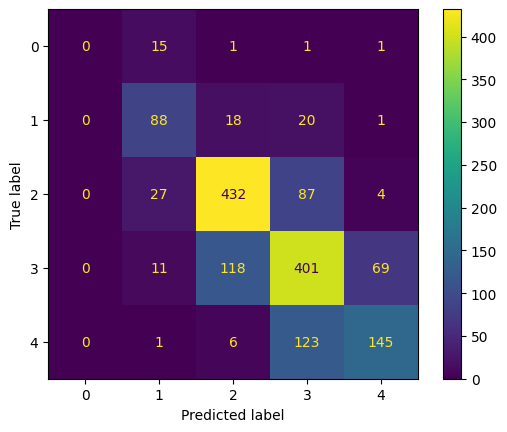

In [ ]:
plot_cmat(test_targets, np.argmax(test_predicts, 1))

# zeroshot learning :سوال دوم

In [ ]:
#@title  snapfood dataset
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">دیتاست اسنپ فود شامل نظرات مردم درباره&zwnj;ی سفارش&zwnj;های خود در اپلیکیشن سفارش غذای اسنپ&zwnj;فود است. این دیتاست شامل سه سطر متن نظر، احساس موجود در نظر و برچسب احساس موجود در نظر است. در کل دو برچسب 0 و 1 (برای دو احساس HAPPY و SAD) در دیتاست وجود دارد. دیتاست اصلی شامل سه فایل train، validation و test است. از آنجا که در این بخش می&zwnj;خواهیم مدل را بر روی این دیتاست به صورت zeroshot آزمایش کنیم، صرفا از دسته&zwnj;ی آخر استفاده می&zwnj;کنیم. فایل مربوطه را می&zwnj;خوانیم و چند سطر از آن &zwnj;را نمایش می&zwnj;دهیم.</p>
</span>
"""
HTML(text)

In [ ]:
snappfood_df = pd.read_csv('/content/drive/MyDrive/NLP_UT/snappfood/test.csv', error_bad_lines=False)
snappfood_df

<ipython-input-93-0a110d6cf6fe>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  snappfood_df = pd.read_csv('/content/drive/MyDrive/NLP_UT/snappfood/test.csv', error_bad_lines=False)
Skipping line 337: expected 1 fields, saw 2
Skipping line 338: expected 1 fields, saw 3
Skipping line 416: expected 1 fields, saw 2
Skipping line 466: expected 1 fields, saw 2
Skipping line 671: expected 1 fields, saw 2
Skipping line 673: expected 1 fields, saw 5
Skipping line 695: expected 1 fields, saw 2
Skipping line 1106: expected 1 fields, saw 3
Skipping line 1391: expected 1 fields, saw 2
Skipping line 1693: expected 1 fields, saw 2
Skipping line 2262: expected 1 fields, saw 2
Skipping line 2535: expected 1 fields, saw 2
Skipping line 2882: expected 1 fields, saw 2
Skipping line 2915: expected 1 fields, saw 2
Skipping line 3252: expected 1 fields, saw 2
Skipping line 3289: expected 1 fields, saw 2
Skipping 

,\tcomment\tlabel\tlabel_id
0,0\tخواهشا خواهشا خواهشا واسه ارسال شیرینیها یه...
1,1\tغذا گرم رسید کیفیت و پخت گوشت عالی بود\tHAP...
2,2\tقیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی ق...
3,3\tعکس توی پیج یه شیرینی شکری روشن رنگ هست که ...
4,4\tباز هم میگم، پیتزا نباید اینقد چرب باشه\tSA...
...,...
6966,6995\tسطح پیتزا سوخته بود متاسفانه و ارزش اون ...
6967,6996\tبسته بندی خیلی بسیار بد شده\tSAD\t1
6968,6997\tسلام خسته نباشید همه چی خوب بود فقط یک م...
6969,6998\tغذا سرد و کیفیت قابل قبول نبود\tSAD\t1


In [ ]:
#@title  ‌
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">از آنجا که دو ستون آخر عملا یکی هستند، ستون دوم را حذف کرده و از دو ستون متن نظر و برچسب استفاده می&zwnj;کنیم.</p>
</span>
"""
HTML(text)

In [ ]:
snappfood_df[['index','text', 'label', 'polarity']] = snappfood_df['\tcomment\tlabel\tlabel_id'].str.split('\t', expand = True)
snappfood_df = snappfood_df.drop(['\tcomment\tlabel\tlabel_id', 'index'], axis = 1)
snappfood_df

,text,label,polarity
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,HAPPY,0
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,HAPPY,0
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,SAD,1
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,SAD,1
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,SAD,1
...,...,...,...
6966,سطح پیتزا سوخته بود متاسفانه و ارزش اون پولو ن...,SAD,1
6967,بسته بندی خیلی بسیار بد شده,SAD,1
6968,سلام خسته نباشید همه چی خوب بود فقط یک مقدار م...,HAPPY,0
6969,غذا سرد و کیفیت قابل قبول نبود,SAD,1


In [ ]:
#print('before swapping labels (just first 10 rows): ',snappfood_df['polarity'][0:10].tolist())
new_labels = [int(i) for i in snappfood_df['polarity']]
snappfood_df['polarity'] = new_labels
#print('\n after swapping labels (just first 10 rows): ', snappfood_df['polarity'][0:10].tolist())


In [ ]:
#@title  ‌
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">پیش‌پردازش‌هایی که بالاتر تعریف کردیم را روی دیتاست اعمال می‌کنیم.</p>
</span>
"""
HTML(text)

In [ ]:
print("Pre-processing snapfood test set: ")
for idx in tqdm(range(len(snappfood_df))):
  p = snappfood_df['text'][idx]    
  p = normalizer.normalize(p)  
  p = custom_preprocessing(p)        
  snappfood_df['text'][idx] = p

Pre-processing snapfood test set: 


  0%|          | 0/6971 [00:00<?, ?it/s]

In [ ]:
#@title  ‌
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">با استفاده از کلاس دیتاستی که قبلا تعریف شد، دیتاست و دیتالودر را برای دیتاست این قسمت نیز می&zwnj;سازیم با این تفاوت که اندازه&zwnj;ی بچ را برابر 2 در نظر می&zwnj;گیریم. در ادامه خروجی getitem دیتاست و خروجی دیتالودر را نیز جهت نمونه نمایش میدهیم.</p>
<p dir="rtl" style="padding-right: 40px; text-align: justify;">&nbsp;توضیحات مربوطه برای این نمونه&zwnj;ها، مشابه توضیحات دیتاست و دیتالودر دیتاست snipers است. تاکید می&zwnj;گردد کلیه&zwnj;ی اقداماتی که بر روی دیتاست اسنپ فود انجام دادیم صرفا جهت آماده کردن دیتاست برای test است و قرار نیست هیچ آموزشی (trainای) بر اساس آن صورت بپذیرد.</p>
</span>
"""
HTML(text)

In [ ]:
Q2_snapfood_ds = Q2_custom_dataset(snappfood_df)       
Q2_snapfood_loader = DataLoader(Q2_snapfood_ds, collate_fn=lambda data: Q2_custom_collator(data, LaBSE_tokenizer), batch_size=2, num_workers=2, pin_memory=True)
next(iter(Q2_snapfood_ds))

('خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فکری بکنید شانس اوردم سفارش شیرینی خشک بود فکر کنم جعبه چپ شده بود واقعا جرات نمی کنم شیرینی تر کیک سفارش بدم شرایط',
 0)

In [ ]:
next(iter(Q2_snapfood_loader))

[{'input_ids': tensor([[   101, 334805,  15383, 334805,  15383, 334805,  15383, 206601,  28385,
          208167,  15945,  39319, 107440,  68646, 193279, 174207,  15190,  58145,
           49768, 208167,  58127,  16865,  27902,  26454, 148582,  91744,  16020,
           16865,  76705, 306989,  18787,  26454, 208167,  18179, 109494,  49768,
          303031,  30062,    102],
         [   101,  54717,  35964,  41317,  30008, 247391,  63293,  38795,  16865,
             102,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0,

In [ ]:
#torch.save(Q2_model.state_dict(), '/content/drive/MyDrive/NLP_UT/HW4/Q2_model_2.pth')

In [ ]:
#@title  #zeroshot
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">اکنون به بخش اصلی این قسمت می&zwnj;رسیم. برای تست مدل آموزش داده شده با داده&zwnj;های snipers روی داده&zwnj;های اسنپ فود، به صورت zeroshot، ابتدا لایه&zwnj;ی آخر مدل که ورودی را به 5 کلاس افراز می&zwnj;کرد حذف کرده و آن را با یک لایه&zwnj;ی خطی دیگر که خروجی آن دو نورون است و ورودی خود را به 2 کلاس افراز می&zwnj;کند جایگزین می&zwnj;کنیم. شَمای مدل حاصل از این تغییر به صورت زیر است:</p>
</span>
"""
HTML(text)

In [ ]:
Q2_model_0shot = copy.deepcopy(Q2_model)
Q2_model_0shot.classifier = nn.Linear(512, 2)
Q2_model_0shot

Q2_custom_model(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(501153, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.13, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.13, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:
#@title  ‌
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">در این مرحله بدون هیچ آموزش جدیدی روی مدل، داده‌های دیتاست را به حالت تست و بدون به روزرسانی وزن‌ها روی مدل امتحان می‌کنیم و نتایج را نمایش میدهیم.</p>
</span>
"""
HTML(text)

In [ ]:
Q2_model_0shot = Q2_model_0shot.to(device)
Q2_model_0shot.eval()
test_targets = []
test_predicts = []
with torch.no_grad():
  for inputs, labels in tqdm(Q2_snapfood_loader):
    [test_targets.append(i) for i in labels]
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = torch.tensor(labels).to(device)    
    output = Q2_model_0shot(input_ids, token_type_ids, attention_mask)
    [test_predicts.append(i) for i in output.detach().cpu().numpy().tolist()]

print('test accuracy: {:.3f}'.format(accuracy(test_targets, np.argmax(test_predicts, 1))))
pre, rec, f1s, _ = precision_recall_fscore_support(test_targets, np.argmax(test_predicts, 1), zero_division = 0)

print('test precision:\n label 0: {:.3f} - label 1: {:.3f}'.format(*pre.tolist()))
print('test recall:\n label 0: {:.3f} - label 1: {:.3f}'.format(*rec.tolist()))
print('test f1_score:\n label 0: {:.3f} - label 1: {:.3f}'.format(*f1s.tolist()))


  0%|          | 0/3486 [00:00<?, ?it/s]

test accuracy: 0.235
test precision:
 label 0: 0.284 - label 1: 0.154
test recall:
 label 0: 0.351 - label 1: 0.118
test f1_score:
 label 0: 0.314 - label 1: 0.134


In [ ]:
#@title  ‌
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">با توجه به نتیجه‌ی حاصل شده کافی است جای برچسب‌ها را برای نتیجه‌ی تست جا به جا کنیم، یعنی برچسب 0 را با 1 و برچسب 1 را با 0 عوض کنیم:</p>
</span>
"""
HTML(text)

In [ ]:
final_test_predicts_flipped = np.argmax(test_predicts, 1)
final_test_predicts_flipped = [-1 * (i-1) for i in final_test_predicts_flipped]
print('before swapping labels: ', final_test_predicts_flipped[0:4])
print(' after swapping labels: ', final_test_predicts_flipped[0:4]) 


before swapping labels:  [1, 0, 1, 1]
 after swapping labels:  [1, 0, 1, 1]


In [ ]:
#@title  ‌ZERO-SHOT result: confusion matrix, accuracy, f1score, recall and precision for test set
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">مجددا نتایج را حساب میکنیم و ماتریس کانفیوژن را نیز نمایش میدهیم (از خروجی تست قبلی استفاده میکنیم):</p>
</span>
"""
HTML(text)

In [ ]:
print('test accuracy: {:.3f}'.format(accuracy(test_targets, final_test_predicts_flipped)))
pre, rec, f1s, _ = precision_recall_fscore_support(test_targets, final_test_predicts_flipped, zero_division = 0)

print('test precision:\n label 0: {:.3f} - label 1: {:.3f}'.format(*pre.tolist()))
print('test recall:\n label 0: {:.3f} - label 1: {:.3f}'.format(*rec.tolist()))
print('test f1_score:\n label 0: {:.3f} - label 1: {:.3f}'.format(*f1s.tolist()))


test accuracy: 0.765
test precision:
 label 0: 0.846 - label 1: 0.716
test recall:
 label 0: 0.649 - label 1: 0.882
test f1_score:
 label 0: 0.734 - label 1: 0.790


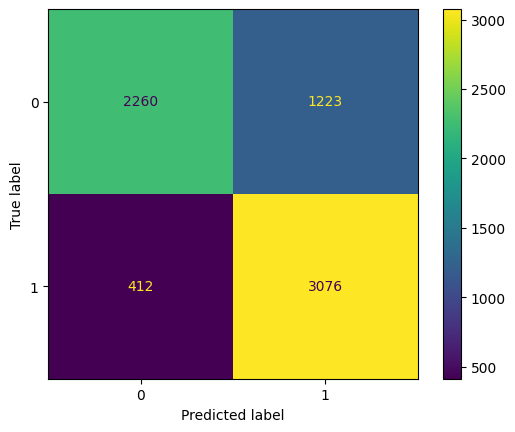

In [ ]:
plot_cmat(test_targets, final_test_predicts_flipped)

In [ ]:
#@title  ‌
text = """
<style>
  @import url('https://fonts.googleapis.com/css2?family=Vazirmatn:wght@400;500;600;800&display=swap');
</style>
<span dir='rtl', style='font-family:Vazirmatn; font-size: 14pt; line-height: 28pt; font-weight: 500; padding-right: 40px; text-align: justify;'>
<p dir="rtl" style="text-align: justify; padding-right: 40px;">با اینکه مدل با داده‌های اسنپ فود اصلا آموزش ندید ولی نتایج قابل قبولی به دست آمد و این نشان دهنده‌ی تاثیر مدل‌ها مبتنی بر BERT و قدرت تعمیم مدل‌های اینچنینی است.</p>
</span>
"""
HTML(text)